In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA


In [2]:
reservations = pd.read_csv('./data/reservations.csv')
reservations.head()

year   month    status status_date  number  day_of_month  \
0  2015  August  Canceled  2014-10-17      33            13   
1  2015    July  Canceled  2014-10-17      28             9   
2  2015    July  Canceled  2014-10-17      28             9   
3  2015    July  Canceled  2014-10-17      28             9   
4  2015    July  Canceled  2014-10-17      28             9   

   reservation_days_advance room_type  weekend_nights  week_nights  ...  \
0                       300         A               0            2  ...   
1                       265         A               0            2  ...   
2                       265         A               0            2  ...   
3                       265         A               0            2  ...   
4                       265         A               0            2  ...   

   entreprise  waiting_list          segment average_rate num_vehicles  \
0         NaN             0  Transient-Party         62.8            0   
1         NaN             0  Transient-Party         62.8            0   
2         NaN             0  Transient-Party         62.8            0   
3         NaN             0  Transient-Party         62.8            0   
4         NaN             0  Transient-Party         62.8            0   

  num_cancellations  num_bookings_not_canceled special_requests  \
0                 1                          0                0   
1                 1                          0                0   
2                 1                          0                0   
3                 1                          0                0   
4                 1                          0                0   

   total_length_of_stay total_spending  
0                     0              0  
1                     0              0  
2                     0              0  
3                     0              0  
4                     0              0  

[5 rows x 31 columns]

In [3]:
reservations.shape
#79390 rows, 31 columns

(79390, 31)

In [4]:
reservations.dtypes

year                           int64
month                         object
status                        object
status_date                   object
number                         int64
day_of_month                   int64
reservation_days_advance       int64
room_type                     object
weekend_nights                 int64
week_nights                    int64
num_adults                     int64
num_children                 float64
num_babies                     int64
meal                          object
name_hotel                    object
CRM                           object
returning                      int64
room_assigned                 object
reservation_changes            int64
deposit                       object
operator                     float64
entreprise                   float64
waiting_list                   int64
segment                       object
average_rate                 float64
num_vehicles                   int64
num_cancellations              int64
n

In [5]:
reservations.describe()

year        number  day_of_month  reservation_days_advance  \
count  79390.000000  79390.000000  79390.000000              79390.000000   
mean    2015.761784     30.334538     15.750661                107.863371   
std        0.509083     13.272608      8.786656                111.159098   
min     2015.000000      1.000000      1.000000                  0.000000   
25%     2015.000000     20.000000      8.000000                 18.000000   
50%     2016.000000     33.000000     16.000000                 70.000000   
75%     2016.000000     41.000000     23.000000                168.000000   
max     2017.000000     53.000000     31.000000                737.000000   

       weekend_nights   week_nights    num_adults  num_children    num_babies  \
count    79390.000000  79390.000000  79390.000000  79386.000000  79390.000000   
mean         0.906852      2.464227      1.849225      0.092094      0.008351   
std          0.997056      1.885558      0.613342      0.377013      0.102708   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      1.000000      2.000000      0.000000      0.000000   
50%          1.000000      2.000000      2.000000      0.000000      0.000000   
75%          2.000000      3.000000      2.000000      0.000000      0.000000   
max         19.000000     50.000000     55.000000     10.000000     10.000000   

          returning  ...      operator   entreprise  waiting_list  \
count  79390.000000  ...  68780.000000  4346.000000  79390.000000   
mean       0.028190  ...     81.438587   161.209158      3.378070   
std        0.165516  ...    104.901383   112.172729     21.264941   
min        0.000000  ...      1.000000     6.000000      0.000000   
25%        0.000000  ...      9.000000    46.000000      0.000000   
50%        0.000000  ...     13.000000   153.000000      0.000000   
75%        0.000000  ...    187.000000   223.000000      0.000000   
max        1.000000  ...    481.000000   487.000000    391.000000   

       average_rate  num_vehicles  num_cancellations  \
count  79390.000000  79390.000000       79390.000000   
mean      95.537943      0.062917           0.124197   
std       47.812391      0.243748           1.023803   
min        0.000000      0.000000           0.000000   
25%       65.000000      0.000000           0.000000   
50%       89.550000      0.000000           0.000000   
75%      117.797500      0.000000           0.000000   
max     5400.000000      3.000000          26.000000   

       num_bookings_not_canceled  special_requests  total_length_of_stay  \
count               79390.000000      79390.000000          79390.000000   
mean                    0.107671          0.501826              2.026817   
std                     1.242978          0.750646              2.572277   
min                     0.000000          0.000000              0.000000   
25%                     0.000000          0.000000              0.000000   
50%                     0.000000          0.000000              1.000000   
75%                     0.000000          1.000000              3.000000   
max                    54.000000          5.000000             69.000000   

       total_spending  
count    79390.000000  
mean       231.245018  
std        308.535028  
min          0.000000  
25%          0.000000  
50%        126.000000  
75%        365.000000  
max       7592.000000  

[8 rows x 21 columns]

In [6]:
reservations.describe(include='object') #object types

month     status status_date room_type   meal  name_hotel  \
count     79390      79390       79390     79390  79390       79390   
unique       12          3         647        10      5           2   
top     October  Check-Out  2015-10-21         A     BB  City Hotel   
freq      11160      48079        1461     59215  62515       52806   

              CRM room_assigned     deposit    segment  
count       79390         79390       79390      79390  
unique          8            12           3          4  
top     Online TA             A  No Deposit  Transient  
freq        34072         50269       67456      56865

In [7]:
for object in reservations.describe(include='object'):
    print(reservations[object].value_counts())

#two different hotels: City Hotel and Resort Hotel


month
October      11160
September    10508
August        9039
July          7648
November      6782
May           6135
April         5945
June          5595
March         5118
December      4395
February      4165
January       2900
Name: count, dtype: int64
status
Check-Out    48079
Canceled     30474
No-Show        837
Name: count, dtype: int64
status_date
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-24       1
2015-02-26       1
2015-02-27       1
2015-03-05       1
2015-03-10       1
Name: count, Length: 647, dtype: int64
room_type
A    59215
D    11574
E     3784
F     1759
G     1264
B      942
C      447
H      393
L        6
P        6
Name: count, dtype: int64
meal
BB           62515
HB           10018
SC            5518
FB             698
Undefined      641
Name: count, dtype: int64
name_hotel
City Hotel      52806
Resort Hotel    26584
Name: count, dtype: int64
CRM
Online TA        34072
Offline TA

In [8]:
reservations.isna().sum()

def prepare_target_var(df):
    df = df.copy()
    df['target_binary'] = df['status'].map(
        {'Canceled': 1, 'Check-Out': 0, 'No-Show':1}
    )
    
    return df

In [9]:
reservations = prepare_target_var(reservations)
reservations.drop(['entreprise', 'operator'], axis=1, inplace=True)

In [10]:
reservations['family_booking'] = ((reservations['num_children'] + reservations['num_babies']) > 0).astype(int)

def convert_month(month_str):
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    return month_map.get(month_str)  

reservations['month'] = reservations['month'].astype(str).apply(convert_month)
reservations = reservations.rename(columns={'day_of_month':'day'})
reservations['reservation_date'] = pd.to_datetime(reservations[['year', 'month', 'day']])
reservations['reservation_done_date'] = reservations['reservation_date'] - pd.to_timedelta(reservations['reservation_days_advance'], unit='D')

reservations['reservations_season'] = pd.cut(reservations['month'], 
                               bins=[0,3,6,9,12], 
                               labels=['Winter', 'Spring', 'Summer', 'Fall'])

reservations['got_reserved_room'] = (reservations['room_type'] == reservations['room_assigned']).astype(int)

print(reservations.isna().sum())
print(reservations.dtypes)

year                         0
month                        0
status                       0
status_date                  0
number                       0
day                          0
reservation_days_advance     0
room_type                    0
weekend_nights               0
week_nights                  0
num_adults                   0
num_children                 4
num_babies                   0
meal                         0
name_hotel                   0
CRM                          0
returning                    0
room_assigned                0
reservation_changes          0
deposit                      0
waiting_list                 0
segment                      0
average_rate                 0
num_vehicles                 0
num_cancellations            0
num_bookings_not_canceled    0
special_requests             0
total_length_of_stay         0
total_spending               0
target_binary                0
family_booking               0
reservation_date             0
reservat

In [11]:
def analyze_hotel_distributions(df):
    """
    Analyze distributions of variables across hotels to determine if separate analysis for each hotel is needed.
    """
    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    categorical_cols.remove('name_hotel')
    
    results = {
        'numerical_tests': {},
        'categorical_tests': {}
    }
    
    # Analyze numerical variables
    for col in numerical_cols:
        # Get data for each hotel
        city_data = df[df['name_hotel'] == 'City Hotel'][col].dropna()
        resort_data = df[df['name_hotel'] == 'Resort Hotel'][col].dropna()
        
        statistic, pvalue = stats.mannwhitneyu(
            city_data, 
            resort_data,
            alternative='two-sided'
        )
        
        # Effect size, we relate the mean differences between the data with the variability for both
        pooled_std = np.sqrt((city_data.var() + resort_data.var()) / 2)
        effect_size = abs(city_data.mean() - resort_data.mean()) / pooled_std
        
        # some basic statistics
        stats_summary = {
            'city_mean': city_data.mean(),
            'resort_mean': resort_data.mean(),
            'city_median': city_data.median(),
            'resort_median': resort_data.median(),
            'city_std': city_data.std(),
            'resort_std': resort_data.std()
        }
        
        results['numerical_tests'][col] = {
            'p_value': pvalue,
            'effect_size': effect_size,
            'significant_difference': pvalue < 0.05,
            'meaningful_difference': effect_size > 0.2,  # Common threshold for small effect
            'statistics': stats_summary
        }
    
    # for categorical
    for col in categorical_cols:
        # creates contingency table for an independence test
        contingency = pd.crosstab(df['name_hotel'], df[col])
        
        # as we learned in stats class, we used chi-square tests of independence
        chi2, pvalue, _, _ = stats.chi2_contingency(contingency)
        
        # how strong is the relationship? (sqrt(chi-squared/(n(k-1))
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        strength = np.sqrt(chi2 / (n * min_dim))
        
        # Distribution analysis
        props = pd.crosstab(df['name_hotel'], df[col], normalize='index')
        max_diff = (props.loc['City Hotel'] - props.loc['Resort Hotel']).abs().max()
        
        results['categorical_tests'][col] = {
            'p_value': pvalue,
            'effect_size': strength,
            'significant_difference': pvalue < 0.05,
            'meaningful_difference': strength > 0.1,  # Common threshold for Cramer's V
            'max_category_difference': max_diff,
            'distribution': props.to_dict()
        }
    
    # to create a summary DataFrame
    summary_data = []
    
    for var_type, tests in results.items():
        for variable, metrics in tests.items():
            summary_data.append({
                'Variable': variable,
                'Type': 'Numerical' if var_type == 'numerical_tests' else 'Categorical',
                'p_value': metrics['p_value'],
                'effect_size': metrics['effect_size'],
                'Significant': metrics['significant_difference'],
                'Meaningful': metrics['meaningful_difference']
            })
    
    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values(
        ['Meaningful', 'Significant', 'effect_size'],
        ascending=[False, False, False]
    )
    
    return summary_df, results

In [12]:
def print_detailed_analysis(results, threshold_effect_size = 0.2):
    """
    Prints detailed analysis of differences between hotels.
    threshold_effect_size (float): Threshold for considering effect size meaningful. We just used the most commonly used.
    """
    print("\nVariables requiring separate analysis by hotel:")
    print("=============================================")
    
    # Analyze numerical variables
    significant_num = []
    for var, metrics in results['numerical_tests'].items():
        if metrics['meaningful_difference'] and metrics['significant_difference']:
            significant_num.append((var, metrics['effect_size']))
    
    if significant_num:
        print("\nNumerical variables:")
        for var, effect in sorted(significant_num, key=lambda x: x[1], reverse=True):
            stats = results['numerical_tests'][var]['statistics']
            print(f"\n{var} (effect size: {effect:.3f}):")
            print(f"  City Hotel: mean={stats['city_mean']:.2f}, median={stats['city_median']:.2f}")
            print(f"  Resort Hotel: mean={stats['resort_mean']:.2f}, median={stats['resort_median']:.2f}")
    
    # Analyze categorical variables
    significant_cat = []
    for var, metrics in results['categorical_tests'].items():
        if metrics['meaningful_difference'] and metrics['significant_difference']:
            significant_cat.append((var, metrics['effect_size']))
    
    if significant_cat:
        print("\nCategorical variables:")
        for var, effect in sorted(significant_cat, key=lambda x: x[1], reverse=True):
            print(f"\n{var} (Effect strength (Cramer's V): {effect:.3f}):")
            props = pd.DataFrame(results['categorical_tests'][var]['distribution'])
            print(props.round(3))
    
    if not significant_num and not significant_cat:
        print("\nNo variables show meaningful differences between hotels!")

In [13]:
# Run the analysis
summary, results = analyze_hotel_distributions(reservations)


# View summary of all variables
print("\nSummary of all variables:")
summary


Summary of all variables:


Variable         Type        p_value  effect_size  \
18       total_length_of_stay    Numerical   0.000000e+00     0.495754   
6                 week_nights    Numerical   0.000000e+00     0.492566   
19             total_spending    Numerical   0.000000e+00     0.488014   
14               num_vehicles    Numerical   0.000000e+00     0.415284   
5              weekend_nights    Numerical   0.000000e+00     0.411388   
28              room_assigned  Categorical   0.000000e+00     0.401197   
25                  room_type  Categorical   0.000000e+00     0.336813   
24                status_date  Categorical   0.000000e+00     0.336602   
20              target_binary    Numerical   0.000000e+00     0.331277   
26                       meal  Categorical   0.000000e+00     0.289291   
22          got_reserved_room    Numerical   0.000000e+00     0.277679   
12               waiting_list    Numerical  1.321937e-287     0.218972   
13               average_rate    Numerical   0.000000e+00     0.203092   
29                    deposit  Categorical   0.000000e+00     0.192958   
23                     status  Categorical   0.000000e+00     0.152466   
27                        CRM  Categorical   0.000000e+00     0.151376   
4    reservation_days_advance    Numerical  8.469757e-124     0.178398   
11        reservation_changes    Numerical  5.108072e-154     0.156743   
0                        year    Numerical   9.672191e-77     0.143184   
17           special_requests    Numerical   2.961814e-53     0.109599   
21             family_booking    Numerical   2.742026e-44     0.102198   
9                  num_babies    Numerical   4.476615e-49     0.089694   
8                num_children    Numerical   3.314278e-24     0.077863   
30                    segment  Categorical   7.868422e-85     0.070344   
7                  num_adults    Numerical   5.244672e-15     0.063326   
10                  returning    Numerical   1.462555e-11     0.049618   
31        reservations_season  Categorical   9.289988e-21     0.034844   
15          num_cancellations    Numerical  3.377801e-194     0.030113   
16  num_bookings_not_canceled    Numerical   4.276260e-86     0.001995   
2                      number    Numerical   7.555890e-01     0.006735   
1                       month    Numerical   7.219814e-01     0.006345   
3                         day    Numerical   4.269450e-01     0.005611   

    Significant  Meaningful  
18         True        True  
6          True        True  
19         True        True  
14         True        True  
5          True        True  
28         True        True  
25         True        True  
24         True        True  
20         True        True  
26         True        True  
22         True        True  
12         True        True  
13         True        True  
29         True        True  
23         True        True  
27         True        True  
4          True       False  
11         True       False  
0          True       False  
17         True       False  
21         True       False  
9          True       False  
8          True       False  
30         True       False  
7          True       False  
10         True       False  
31         True       False  
15         True       False  
16         True       False  
2         False       False  
1         False       False  
3         False       False

In [14]:
print_detailed_analysis(results)


Variables requiring separate analysis by hotel:

Numerical variables:

total_length_of_stay (effect size: 0.496):
  City Hotel: mean=1.57, median=1.00
  Resort Hotel: mean=2.93, median=2.00

week_nights (effect size: 0.493):
  City Hotel: mean=2.14, median=2.00
  Resort Hotel: mean=3.12, median=3.00

total_spending (effect size: 0.488):
  City Hotel: mean=177.25, median=104.00
  Resort Hotel: mean=338.49, median=193.00

num_vehicles (effect size: 0.415):
  City Hotel: mean=0.03, median=0.00
  Resort Hotel: mean=0.14, median=0.00

weekend_nights (effect size: 0.411):
  City Hotel: mean=0.77, median=1.00
  Resort Hotel: mean=1.19, median=1.00

target_binary (effect size: 0.331):
  City Hotel: mean=0.45, median=0.00
  Resort Hotel: mean=0.29, median=0.00

got_reserved_room (effect size: 0.278):
  City Hotel: mean=0.89, median=1.00
  Resort Hotel: mean=0.80, median=1.00

waiting_list (effect size: 0.219):
  City Hotel: mean=4.76, median=0.00
  Resort Hotel: mean=0.64, median=0.00

average

In [15]:
def plot_distributions(df, results, show_all = False):
    """
    create visualizations for variable distributions across hotels. 
    if show_all is set to True, all variables are plotted, does not matter if they have significant differences across hotels.
    if show_all is set to False (default), only variables with meaningful differences are plotted
    """
    def create_numerical_plot(data, var, has_difference):
        """Helper function to create numerical variable plots"""
        plt.figure(figsize=(12, 6))
        
        # left subplot: Boxplot
        plt.subplot(1, 2, 1)
        sns.boxplot(data=data, x='name_hotel', y=var)
        plt.title(f'Distribution of {var} by Hotel Type\n{"(Significant Difference)" if has_difference else "(No Significant Difference)"}')
        
        # right subplot: KDE plot
        plt.subplot(1, 2, 2)
        for hotel in ['City Hotel', 'Resort Hotel']:
            sns.kdeplot(data=data[data['name_hotel'] == hotel][var], label=hotel)
        plt.title(f'Density Distribution of {var}')
        plt.legend(title='Hotel')
        plt.tight_layout()
        plt.show()

    def create_categorical_plot(data, var, has_difference):
        """Helper function to create categorical variable plots"""
        # Calculate proportions
        props = pd.crosstab(data['name_hotel'], data[var], normalize='index')
        plt.figure(figsize=(12, 6))
        #comparison bar plot
        props.T.plot(kind='bar')
        plt.title(f'Category Distribution Comparison')
        plt.xlabel(var)
        plt.ylabel('Proportion')
        plt.legend(title='Hotel')
        plt.tight_layout()
        plt.show()

    # Plot numerical variables
    print("\n=== Numerical Variables ===")
    for var, metrics in results['numerical_tests'].items():
        if show_all or (metrics['meaningful_difference'] and metrics['significant_difference']):
            print(f"\nPlotting {var} (Effect size: {metrics['effect_size']:.3f})")
            has_difference = metrics['meaningful_difference'] and metrics['significant_difference']
            create_numerical_plot(df, var, has_difference)

    # Plot categorical variables
    print("\n=== Categorical Variables ===")
    for var, metrics in results['categorical_tests'].items():
        if show_all or (metrics['meaningful_difference'] and metrics['significant_difference']):
            print(f"\nPlotting {var} (Cramer's V: {metrics['effect_size']:.3f})")
            has_difference = metrics['meaningful_difference'] and metrics['significant_difference']
            create_categorical_plot(df, var, has_difference)



=== Numerical Variables ===

Plotting year (Effect size: 0.143)


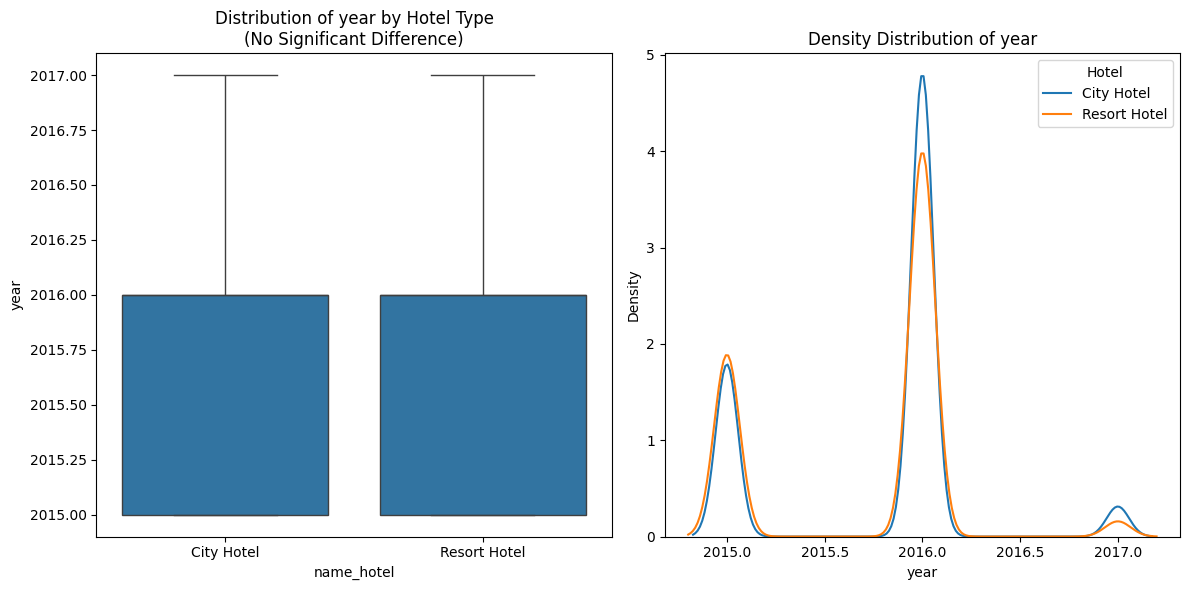


Plotting month (Effect size: 0.006)


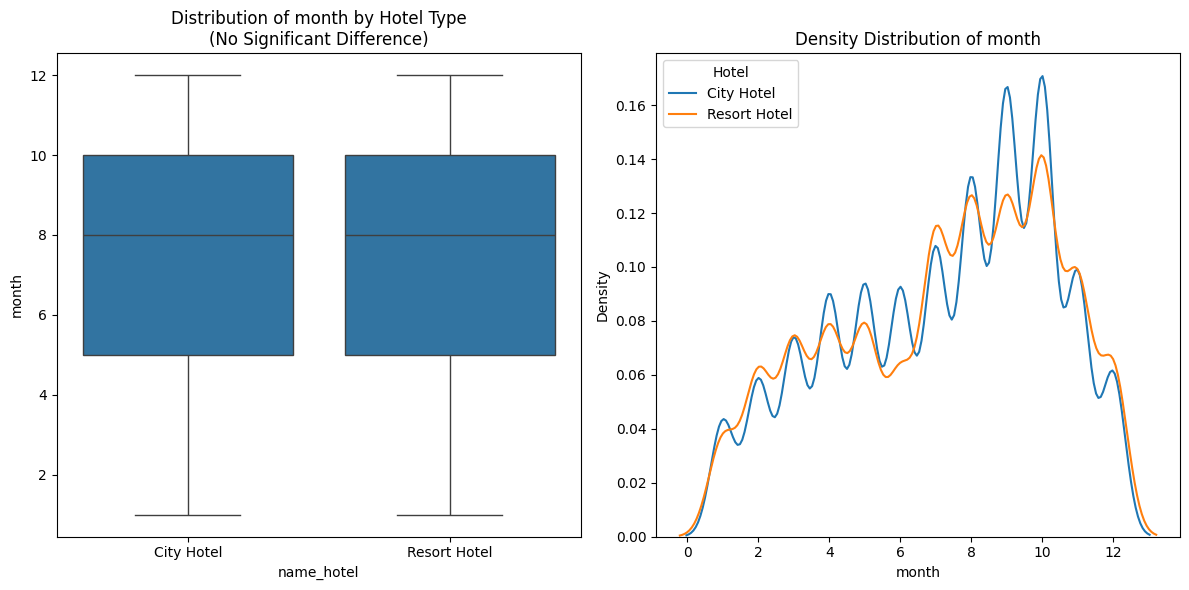


Plotting number (Effect size: 0.007)


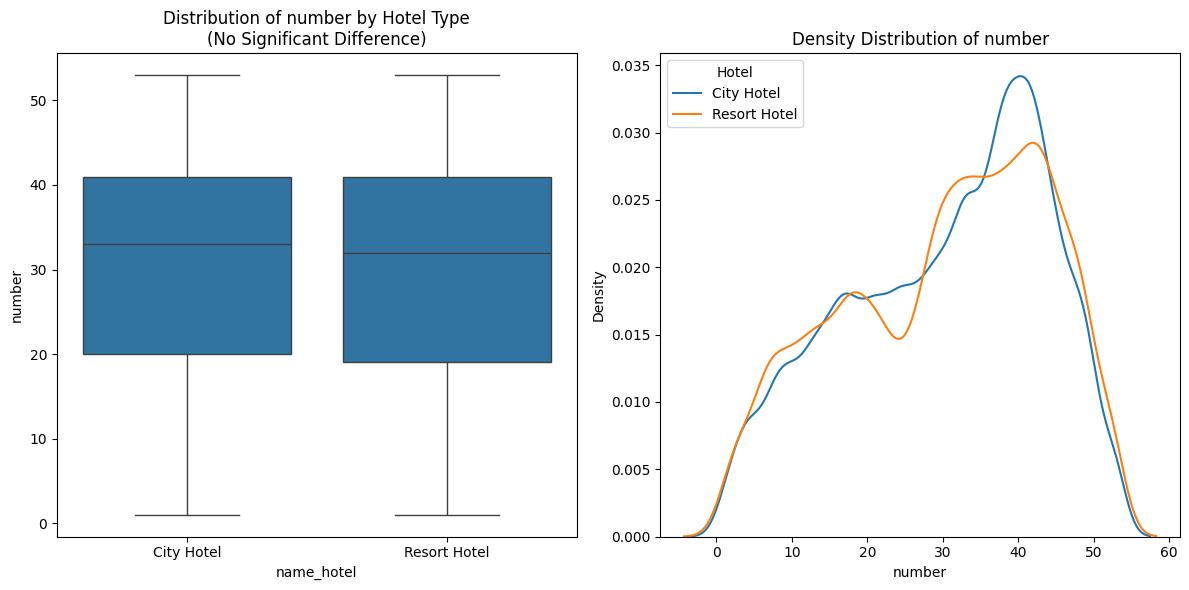


Plotting day (Effect size: 0.006)


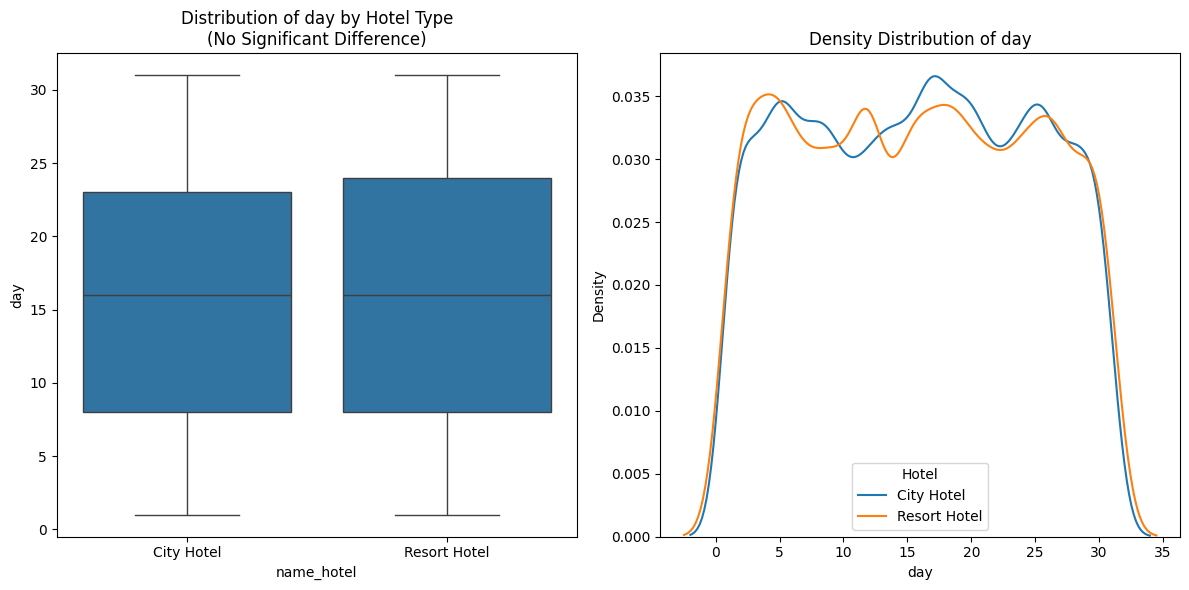


Plotting reservation_days_advance (Effect size: 0.178)


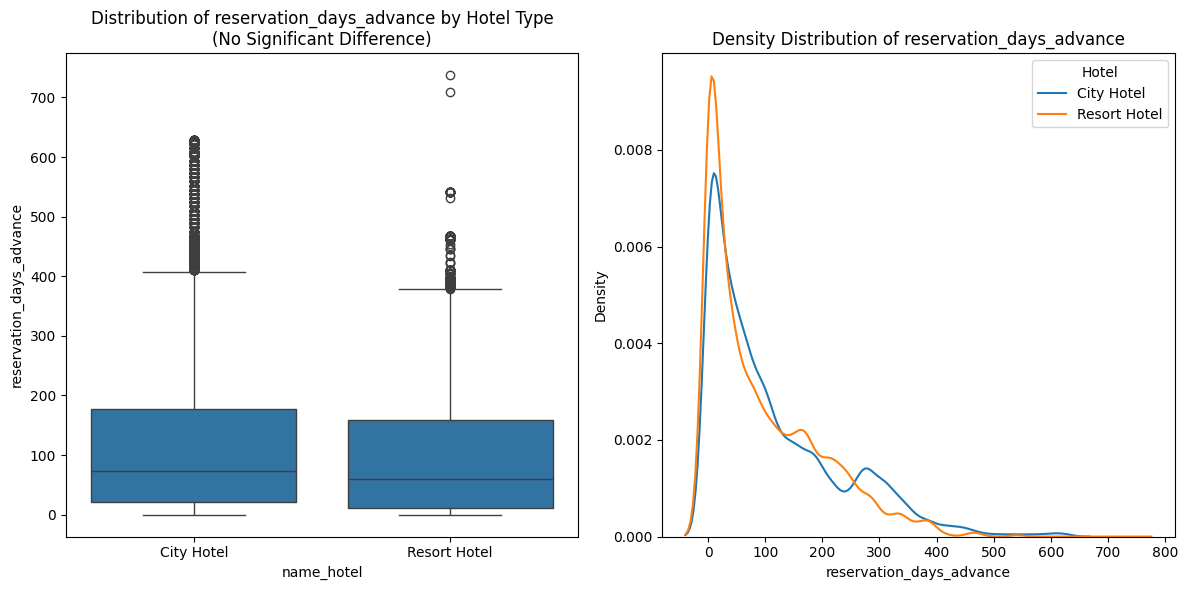


Plotting weekend_nights (Effect size: 0.411)


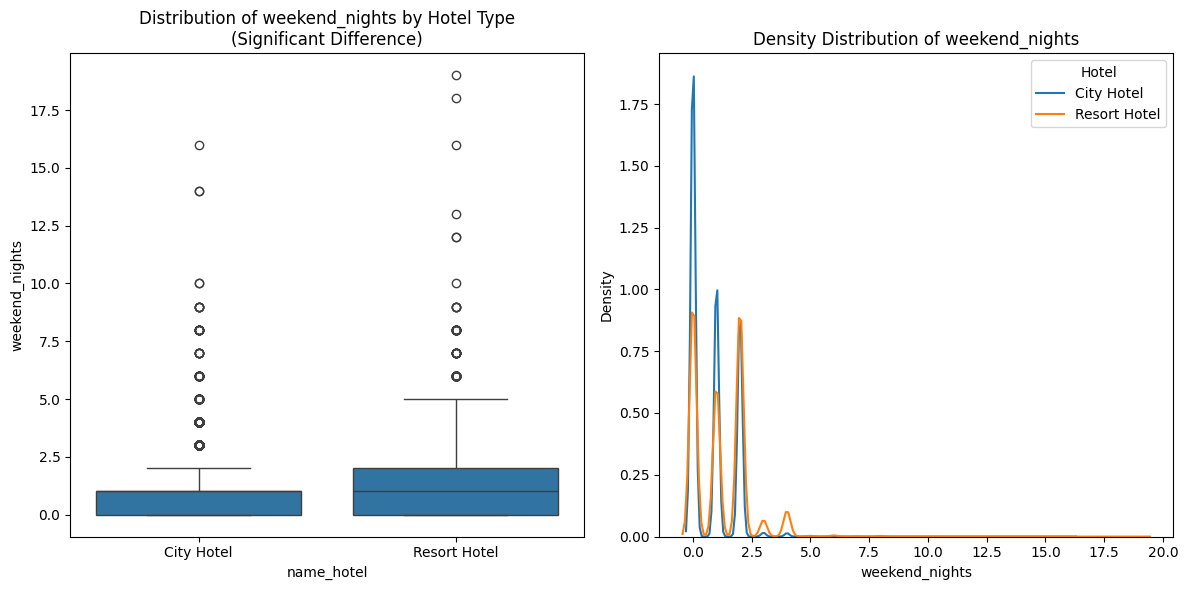


Plotting week_nights (Effect size: 0.493)


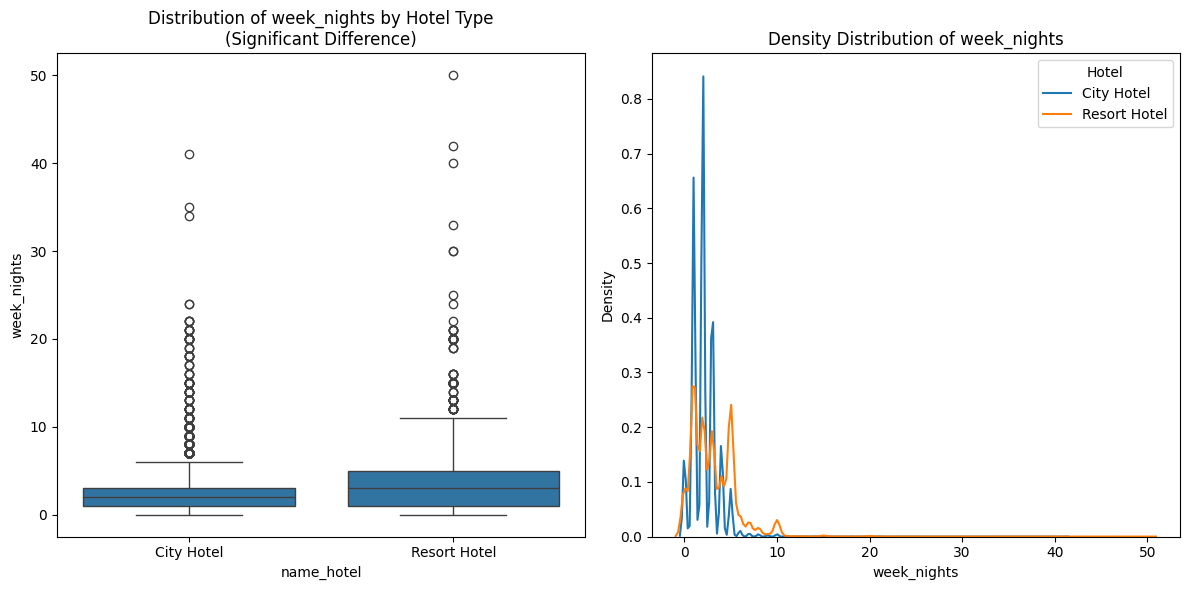


Plotting num_adults (Effect size: 0.063)


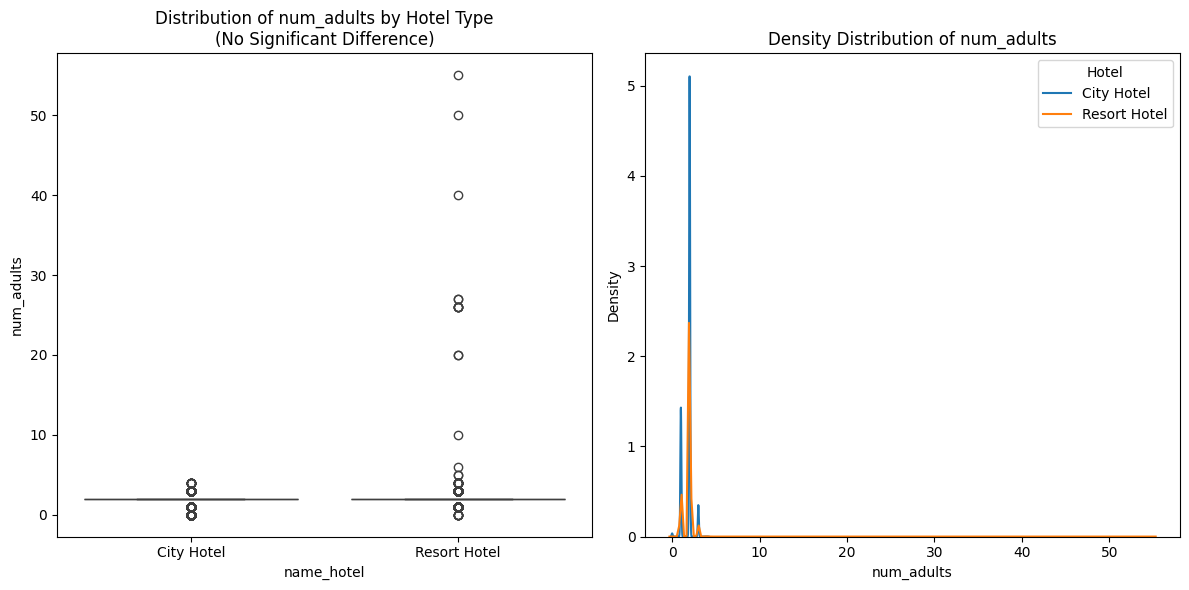


Plotting num_children (Effect size: 0.078)


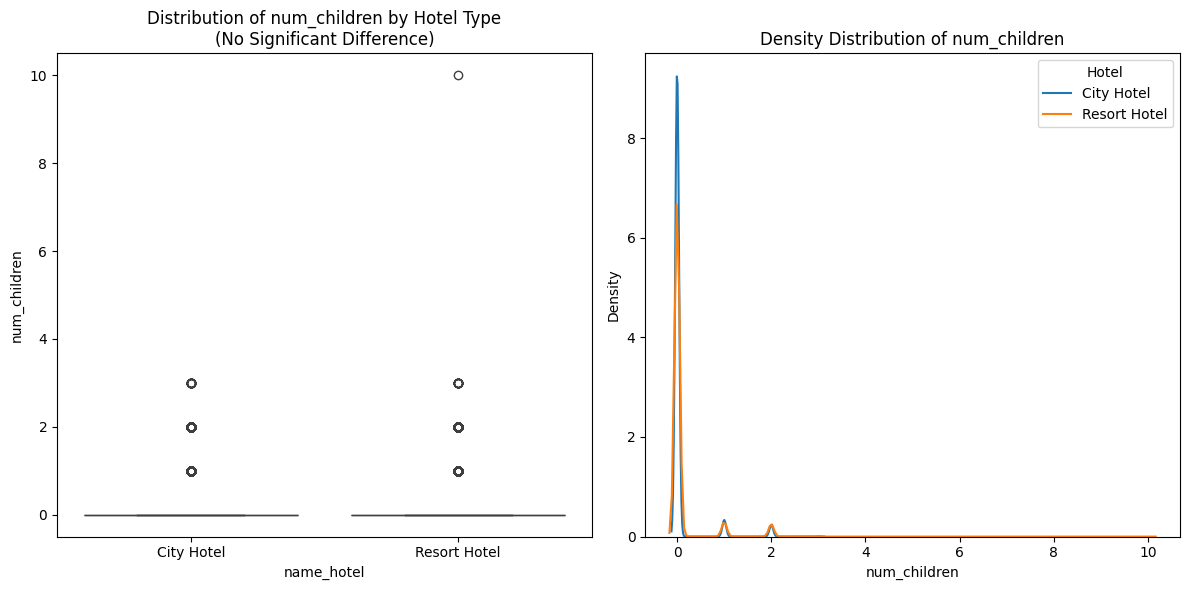


Plotting num_babies (Effect size: 0.090)


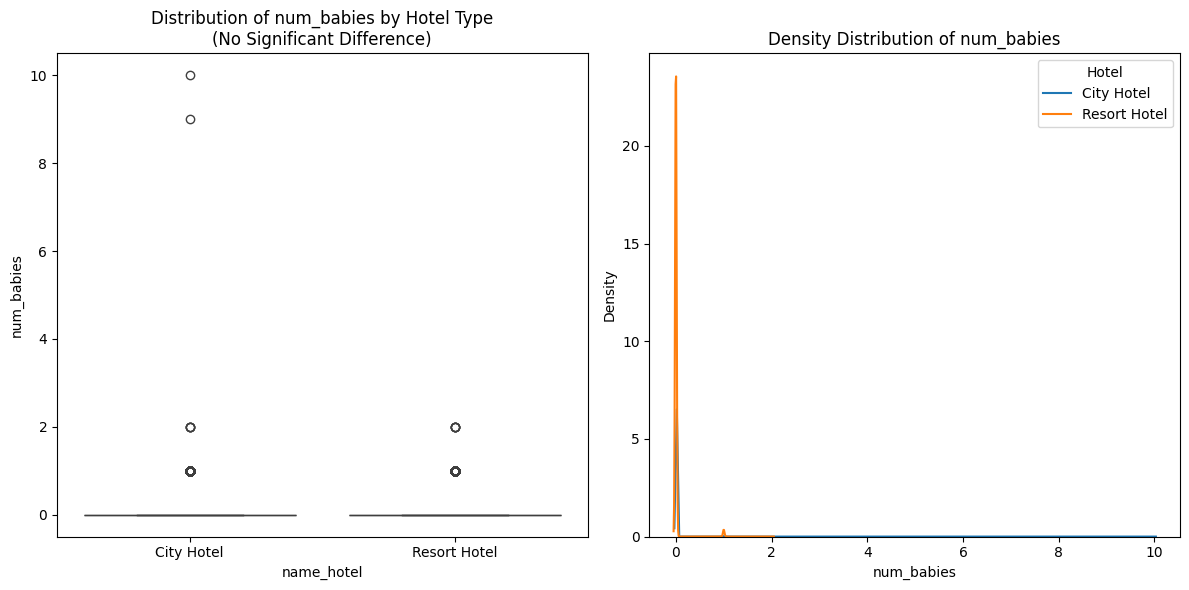


Plotting returning (Effect size: 0.050)


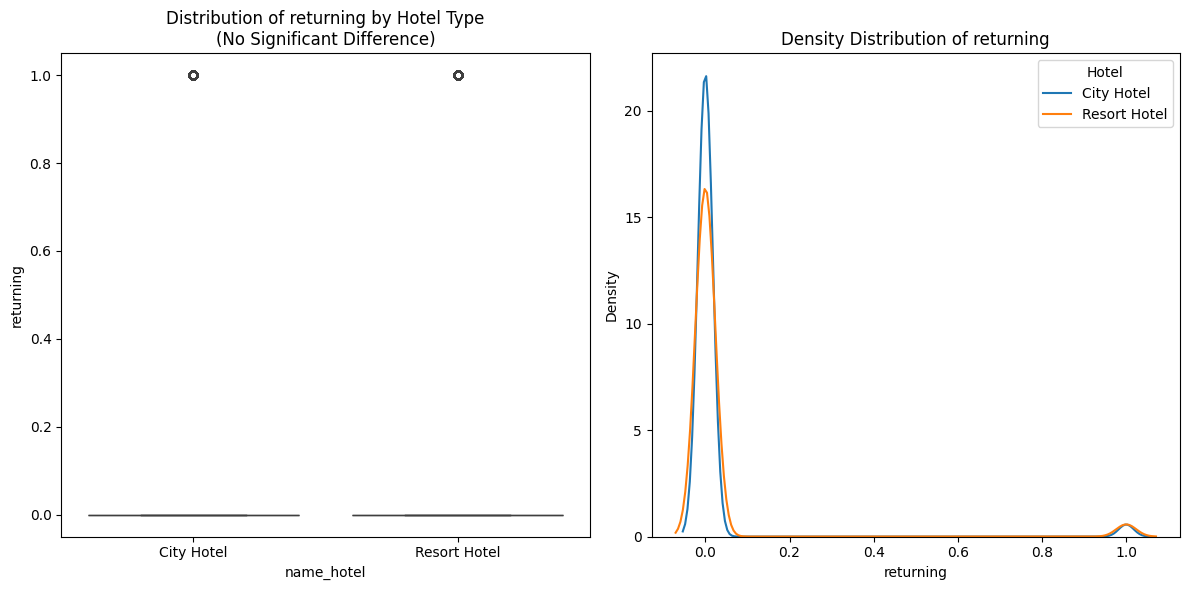


Plotting reservation_changes (Effect size: 0.157)


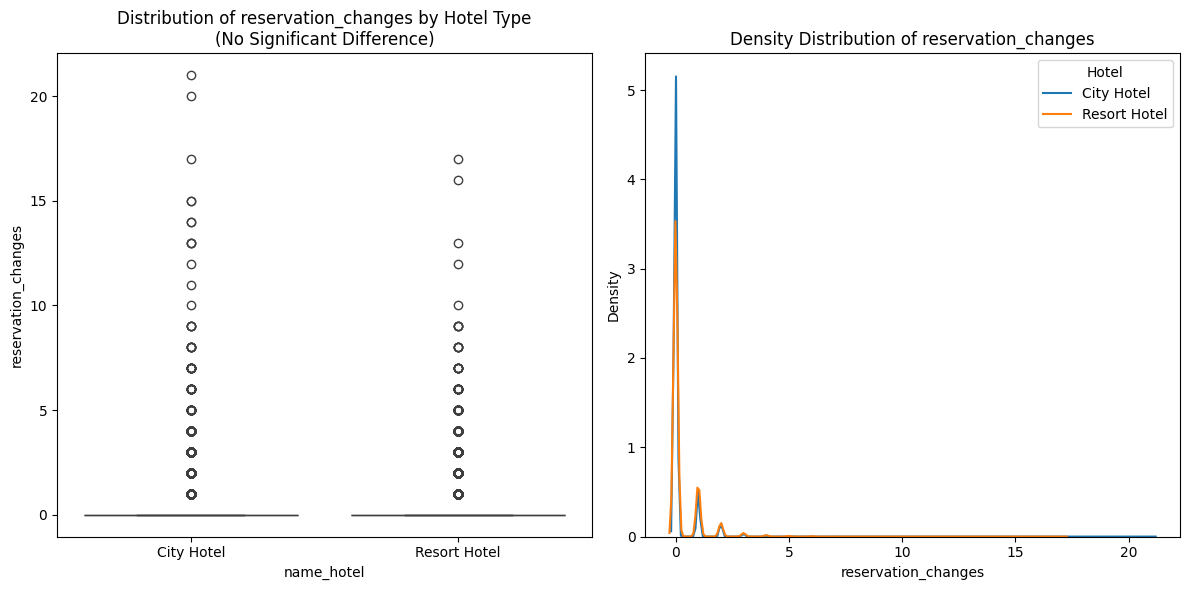


Plotting waiting_list (Effect size: 0.219)


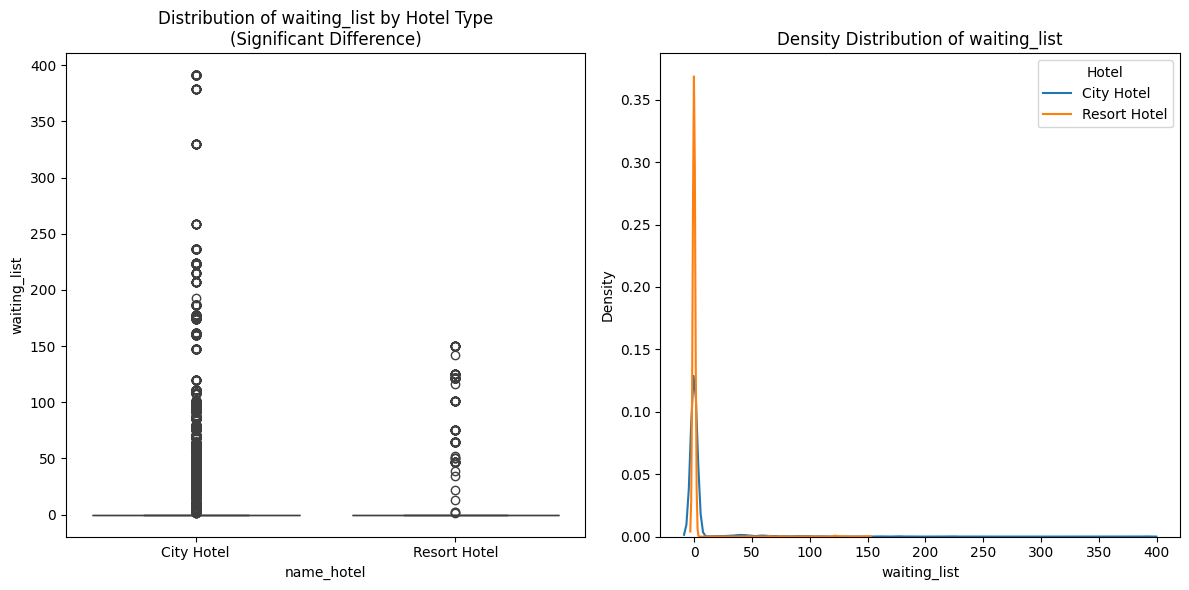


Plotting average_rate (Effect size: 0.203)


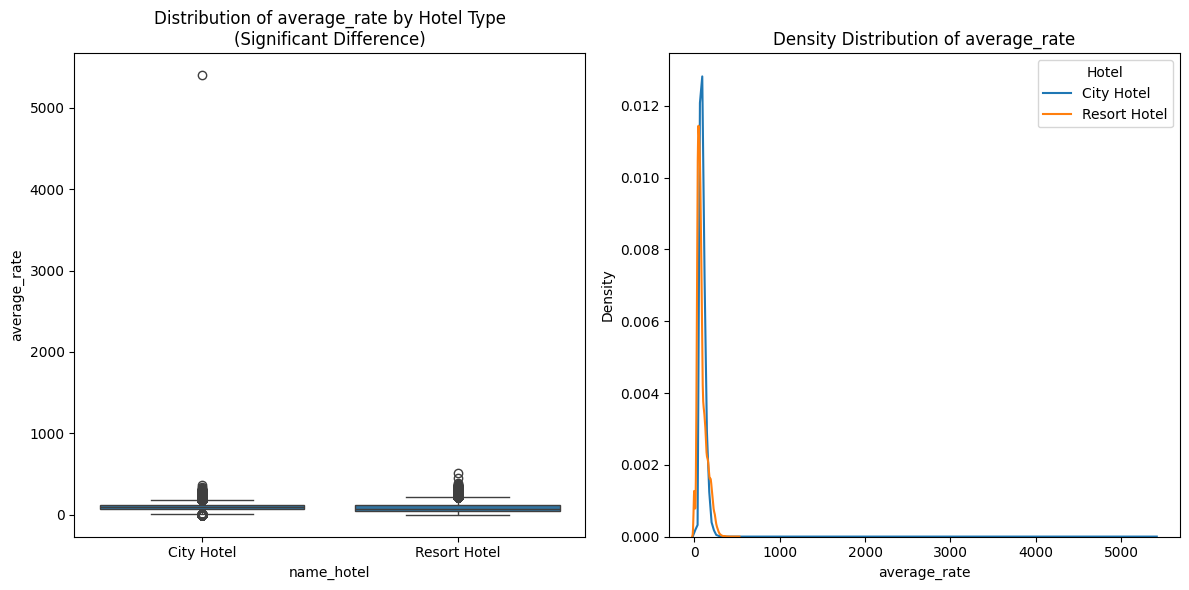


Plotting num_vehicles (Effect size: 0.415)


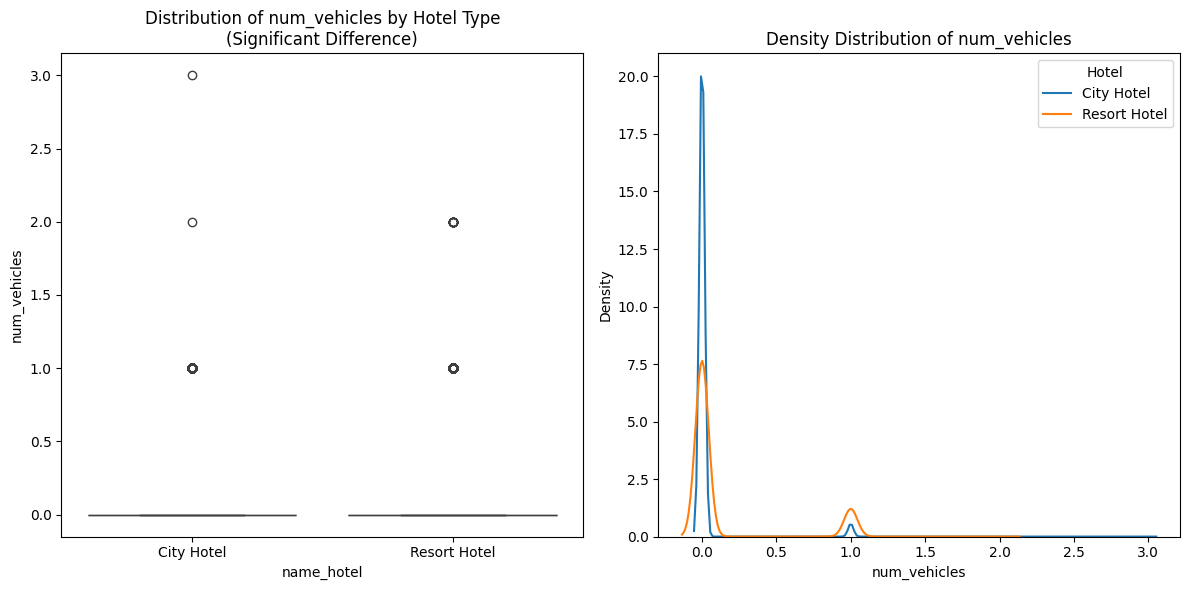


Plotting num_cancellations (Effect size: 0.030)


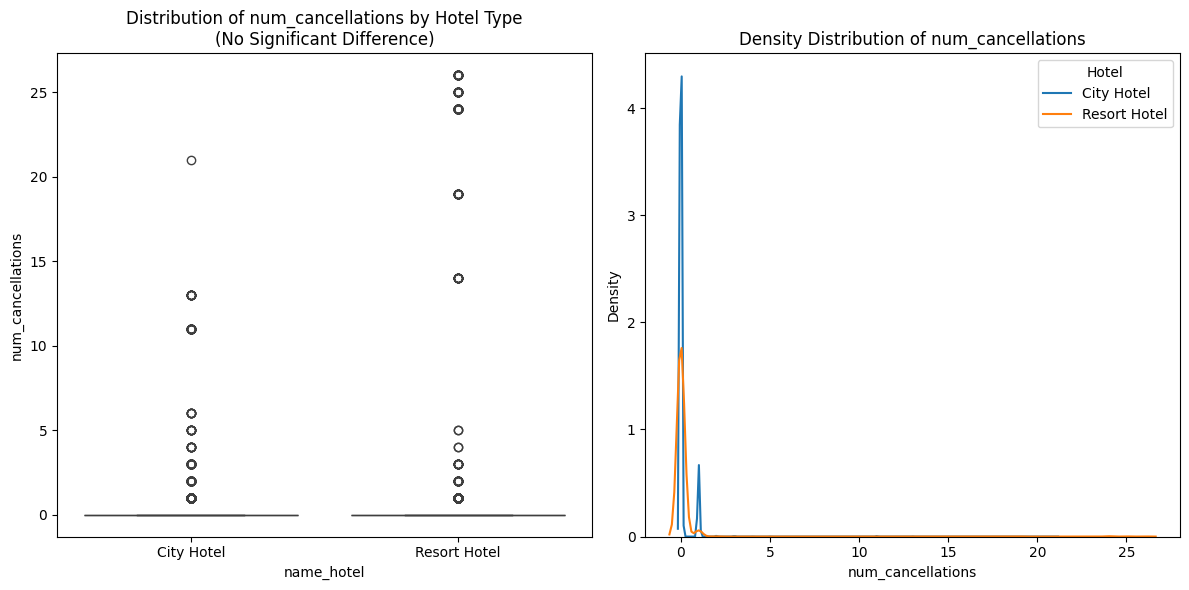


Plotting num_bookings_not_canceled (Effect size: 0.002)


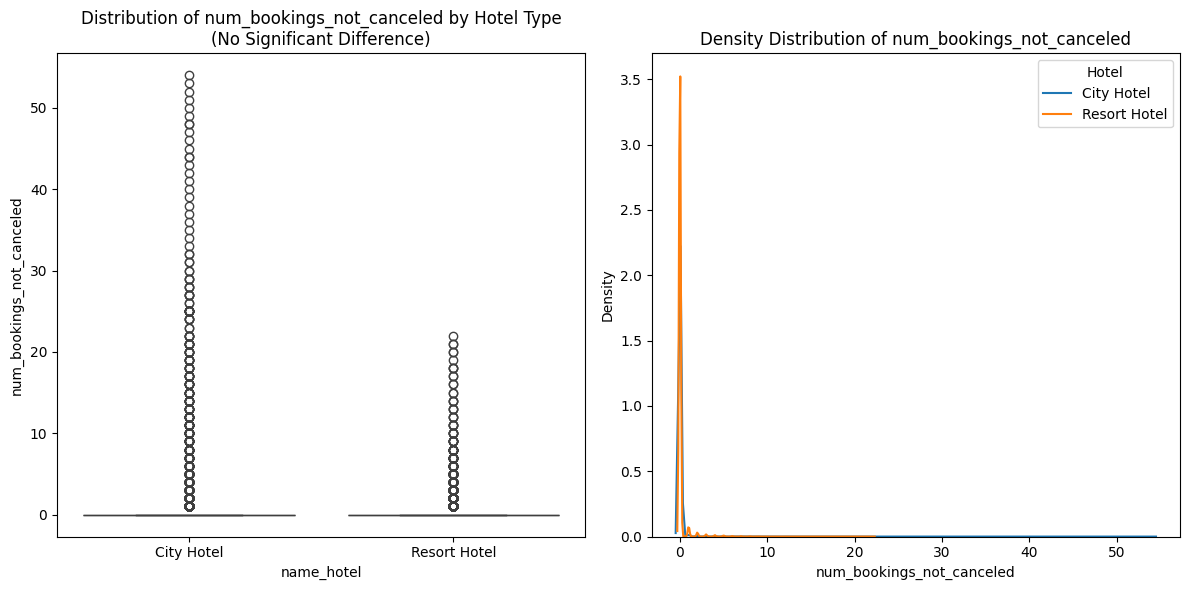


Plotting special_requests (Effect size: 0.110)


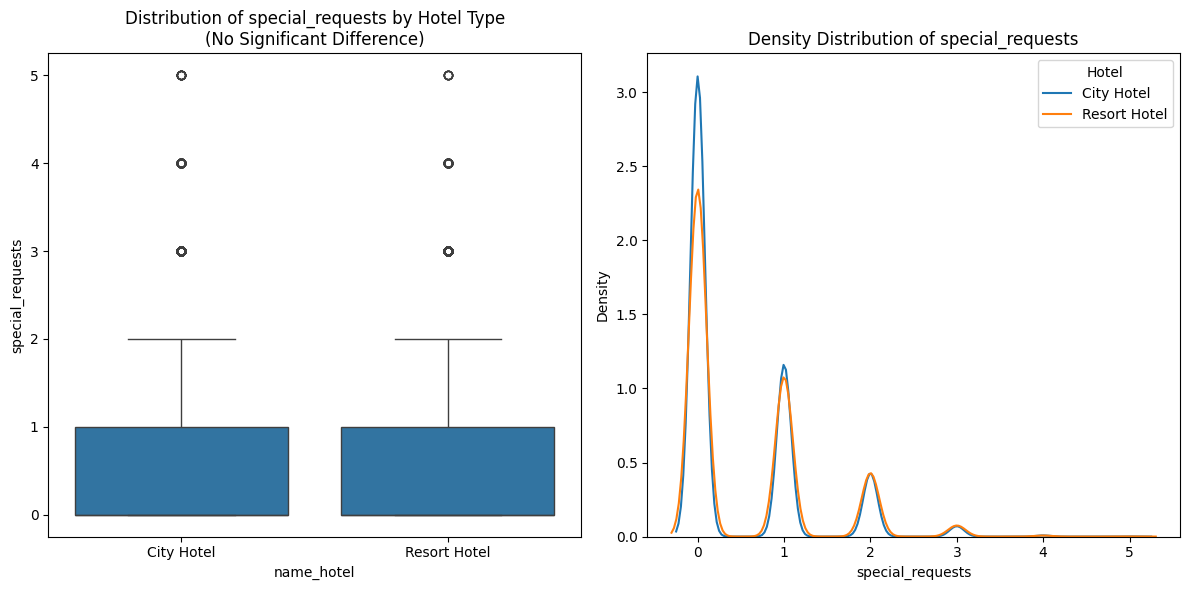


Plotting total_length_of_stay (Effect size: 0.496)


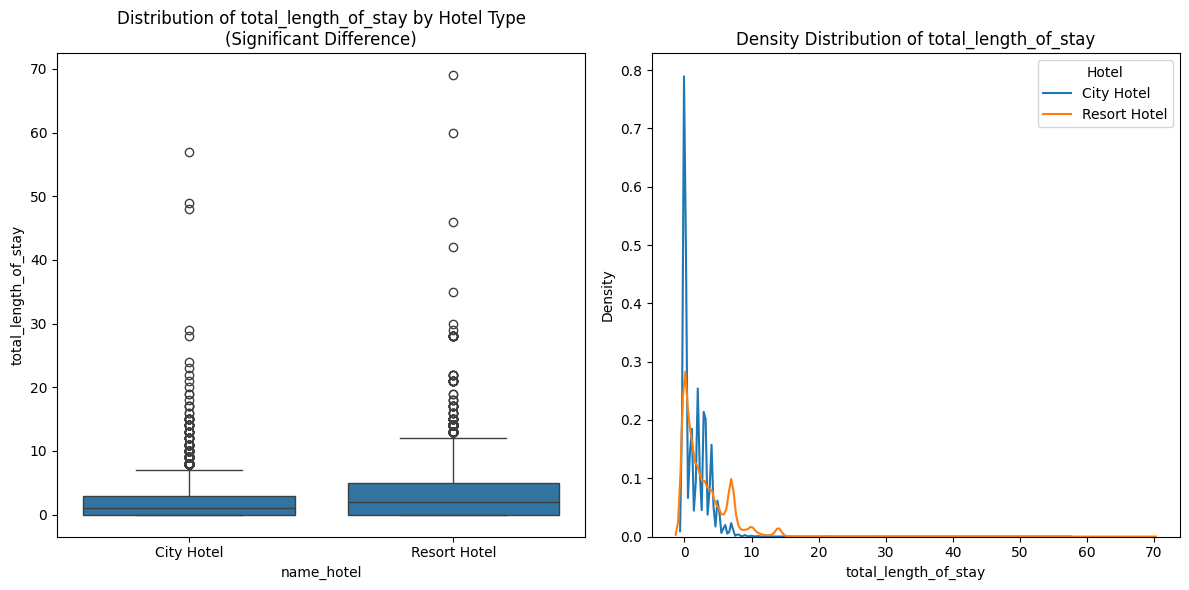


Plotting total_spending (Effect size: 0.488)


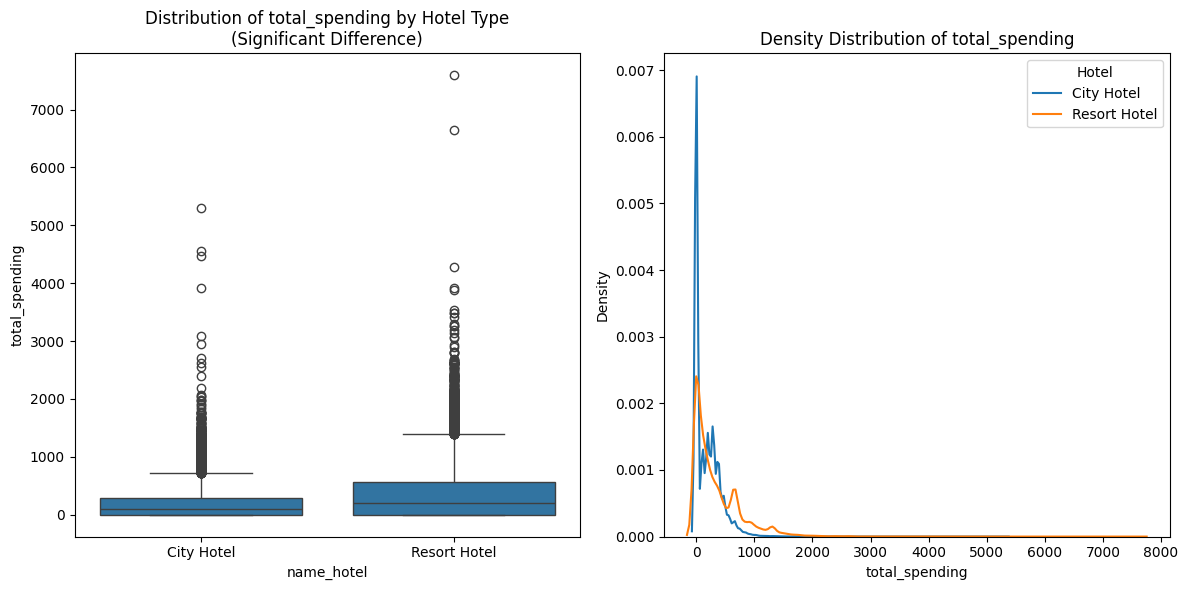


Plotting target_binary (Effect size: 0.331)


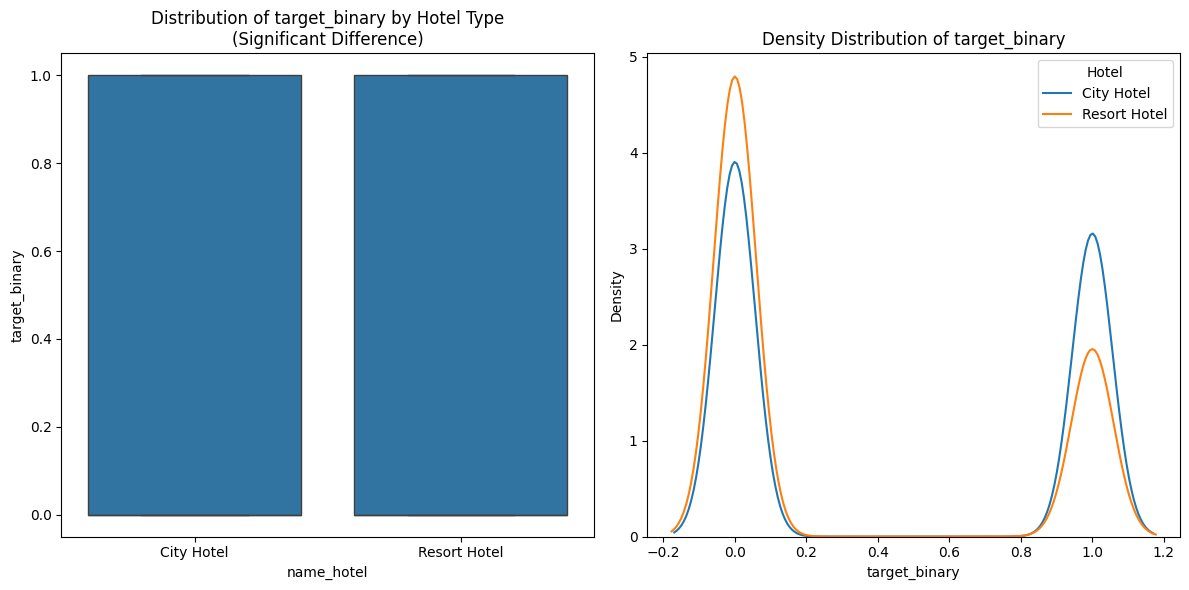


Plotting family_booking (Effect size: 0.102)


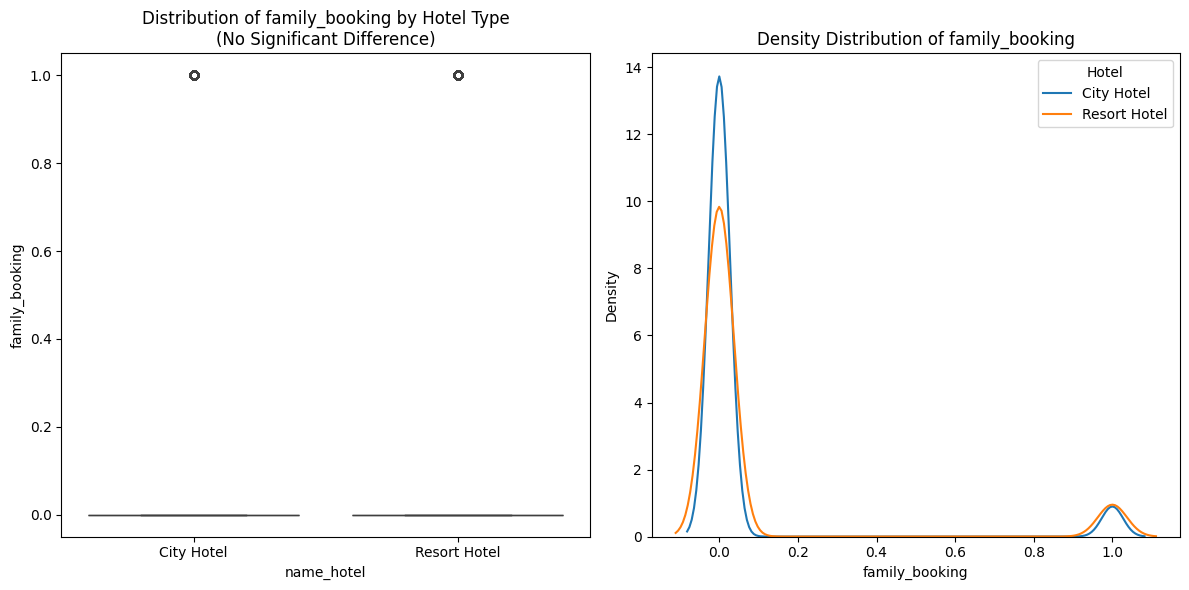


Plotting got_reserved_room (Effect size: 0.278)


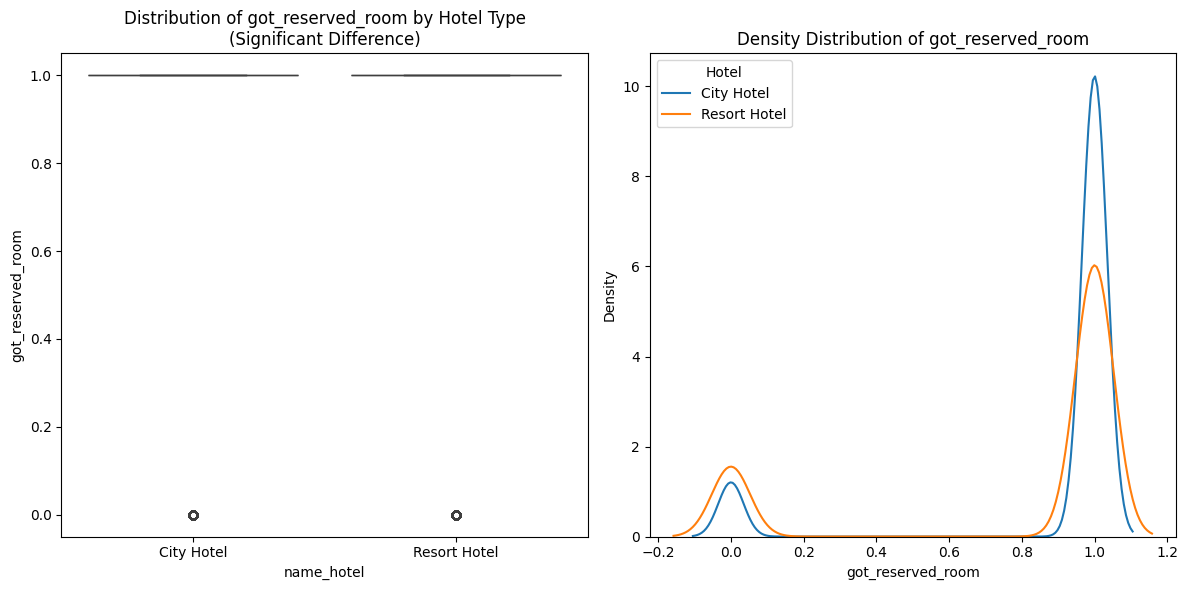


=== Categorical Variables ===

Plotting status (Cramer's V: 0.152)


<Figure size 1200x600 with 0 Axes>

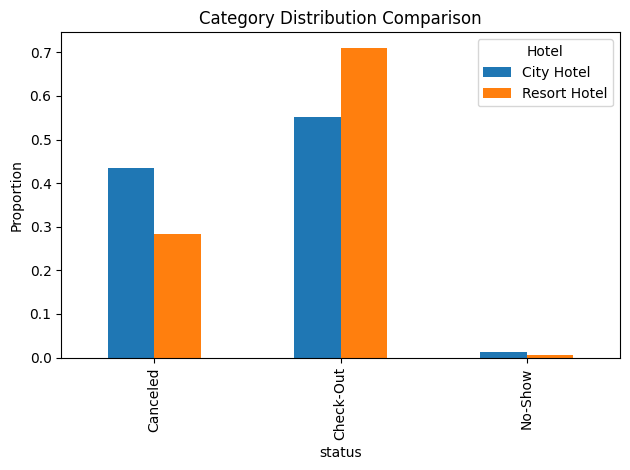


Plotting status_date (Cramer's V: 0.337)


<Figure size 1200x600 with 0 Axes>

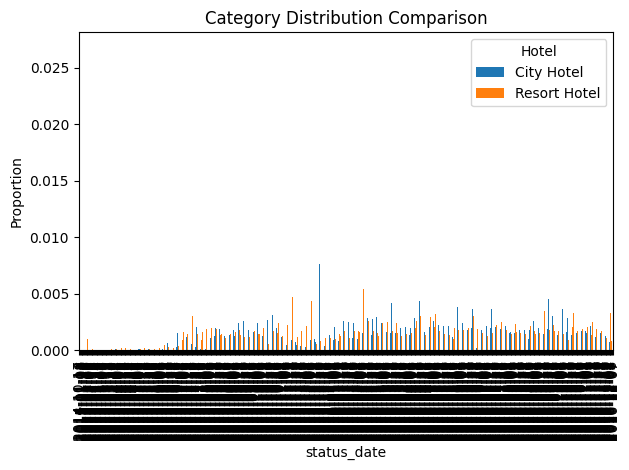


Plotting room_type (Cramer's V: 0.337)


<Figure size 1200x600 with 0 Axes>

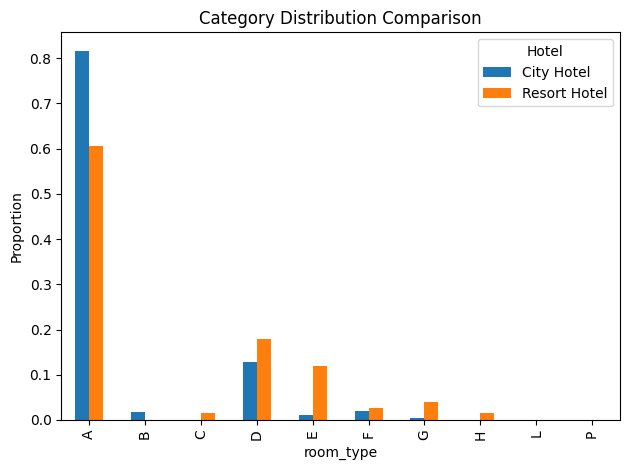


Plotting meal (Cramer's V: 0.289)


<Figure size 1200x600 with 0 Axes>

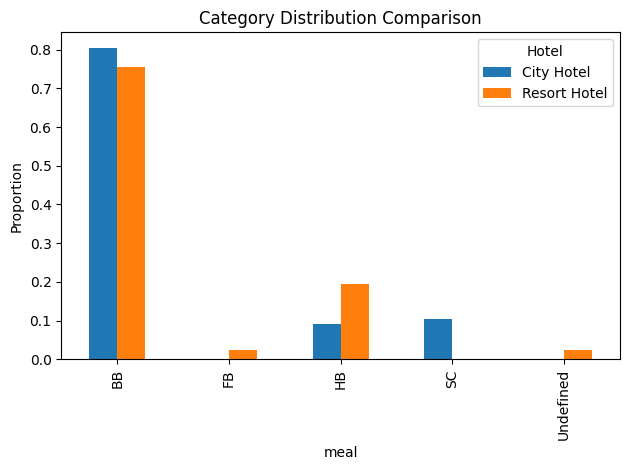


Plotting CRM (Cramer's V: 0.151)


<Figure size 1200x600 with 0 Axes>

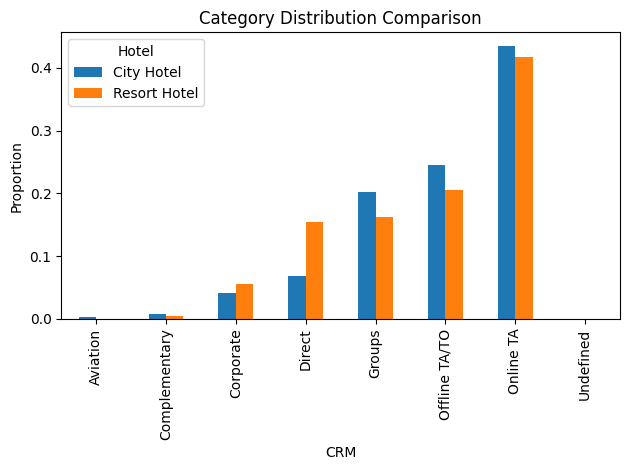


Plotting room_assigned (Cramer's V: 0.401)


<Figure size 1200x600 with 0 Axes>

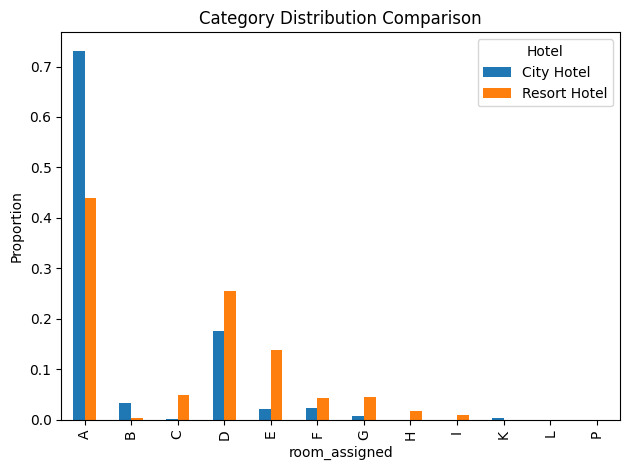


Plotting deposit (Cramer's V: 0.193)


<Figure size 1200x600 with 0 Axes>

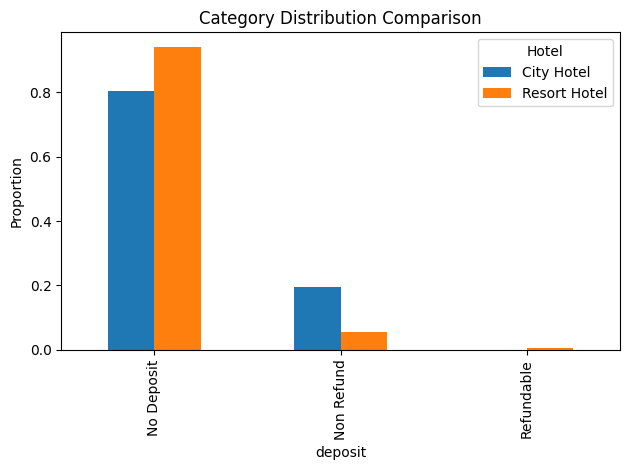


Plotting segment (Cramer's V: 0.070)


<Figure size 1200x600 with 0 Axes>

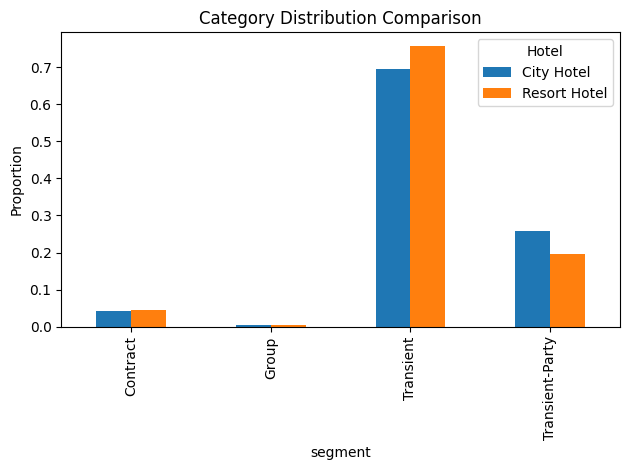


Plotting reservations_season (Cramer's V: 0.035)


<Figure size 1200x600 with 0 Axes>

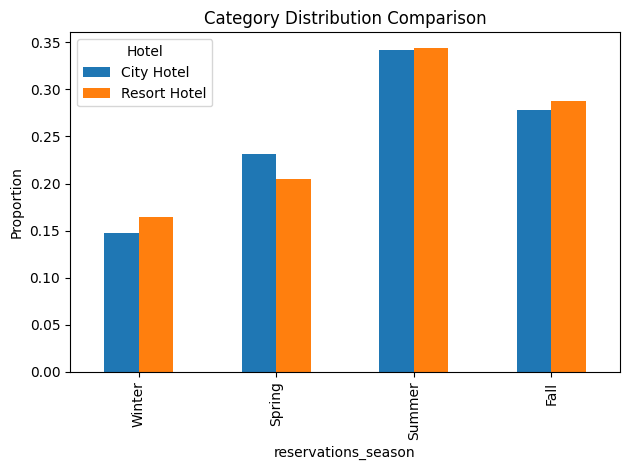

In [618]:
plot_distributions(reservations, results, show_all=True)

In [16]:
def target_relationships(df):
    '''
    analyze relationships between features and target variables, to see which seem to create the most separability.
    this is a complement to the visualizations, not to rely only on info conveyed on visualizations, which we might miss.
    '''
    results = {
        'numerical_analysis': {},
        'categorical_analysis': {}
    }

    df = prepare_target_var(df)
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    numerical_cols.remove('target_binary')

    for col in numerical_cols:
        # we use the r coefficient to measure relationship between feature and target variable. 
        # varies between -1 and 1, 0 implying no correlation. 
        #stats.pointbiserialr should yield the same results as stats.pearsonr, which we studied in stats class.
        correlation = stats.pointbiserialr(df[col], df['target_binary'])
        
        fulfilled = df[df['target_binary'] == 0][col]
        canceled = df[df['target_binary'] == 1][col]
        pooled_std = np.sqrt((fulfilled.var() + canceled.var()) / 2)
        effect_size = abs(fulfilled.mean() - canceled.mean()) / pooled_std
        results['numerical_analysis'][col] = {
            'correlation': correlation.correlation,
            'p_value': correlation.pvalue,
            'effect_size': effect_size,
            'significant': correlation.pvalue < 0.05,
            'meaningful': abs(correlation.correlation) > 0.1 # we
        }
    
    # analyze categorical variables
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    if 'status' in categorical_cols:
        categorical_cols.remove('status')
    
    for col in categorical_cols:
        # chi-square independence test
        contingency = pd.crosstab(df[col], df['target_binary'])
        chi2, p_value, _, _ = stats.chi2_contingency(contingency)
        
        n = contingency.sum().sum()
        min_dim = min(contingency.shape) - 1
        strength = np.sqrt(chi2 / (n * min_dim))
        
        results['categorical_analysis'][col] = {
            'chi2': chi2,
            'p_value': p_value,
            'cramer_v': strength,
            'significant': p_value < 0.05,
            'meaningful': strength > 0.1
        }
    
    return results


In [17]:
target_results = target_relationships(reservations)
target_results

{'numerical_analysis': {'year': {'correlation': np.float64(0.12154670997617165),
   'p_value': np.float64(6.116501868571058e-259),
   'effect_size': np.float64(0.24421095719093003),
   'significant': np.True_,
   'meaningful': np.True_},
  'month': {'correlation': np.float64(-0.010986018090784228),
   'p_value': np.float64(0.00196487658048483),
   'effect_size': np.float64(0.02247814549604479),
   'significant': np.True_,
   'meaningful': np.False_},
  'number': {'correlation': np.float64(-0.01549172057146482),
   'p_value': np.float64(1.2702033697638871e-05),
   'effect_size': np.float64(0.03170561987932447),
   'significant': np.True_,
   'meaningful': np.False_},
  'day': {'correlation': np.float64(-0.004041924491672027),
   'p_value': np.float64(0.2547662628473415),
   'effect_size': np.float64(0.008265182444376195),
   'significant': np.False_,
   'meaningful': np.False_},
  'reservation_days_advance': {'correlation': np.float64(0.36034392688911465),
   'p_value': np.float64(0.0),

In [621]:
def plot_target_relationships(df, target_analysis):
    """
    plot relationships between features and target variable using multiple visualization techniques.
    """
    df = prepare_target_var(df)
    
    # Numerical variable plotting
    numerical_vars = list(target_analysis['numerical_analysis'].keys())
    n_num = len(numerical_vars)
    
    if n_num > 0:
        for var in numerical_vars:
            metrics = target_analysis['numerical_analysis'][var]
            
            # Create figure with 2 subplots side by side
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
            fig.suptitle(f'{var} vs Target\nCorrelation: {metrics["correlation"]:.3f} | p-value: {metrics["p_value"]:.3e}')
            
            # Box plot
            sns.boxplot(x='target_binary', y=var, data=df, ax=ax1)
            ax1.set_xlabel('Canceled (1) vs Fulfilled (0)')
            ax1.set_title('Box Plot')
            
            # Density plot
            for target_val in [0, 1]:
                subset = df[df['target_binary'] == target_val][var]
                sns.kdeplot(data=subset, ax=ax2, label=f'{"Canceled" if target_val == 1 else "Fulfilled"}')
            ax2.set_title('Density Plot')
            ax2.legend()
            
            plt.tight_layout()
            plt.show()
    
    # categorical variable plotting
    categorical_vars = list(target_analysis['categorical_analysis'].keys())
    
    for var in categorical_vars:
        metrics = target_analysis['categorical_analysis'][var]
        plt.figure(figsize=(12, 6))

        #normalized stacked bar plot
        props = pd.crosstab(df[var], df['target_binary'], normalize='index')
        props.plot(kind='bar', stacked=True)

        plt.title(f'{var} vs Target\nCramer\'s V: {metrics["cramer_v"]:.3f}\np-value: {metrics["p_value"]:.3e}')
        plt.xlabel(var)
        plt.ylabel('Proportion')
        plt.legend(['Fulfilled (0)', 'Canceled (1)'])
        plt.tight_layout()
        plt.show()

In [19]:
def plot_feature_importance(target_analysis_results):
    '''
    feature importance proxy visualizations based on correlation (numerical) 
    and chi-squared (categorical) statistics.
    '''
    # prepare data for numerical features
    numerical_data = []
    for feature, metrics in target_analysis_results['numerical_analysis'].items():
        numerical_data.append({
            'feature': feature,
            'importance': abs(metrics['correlation']),  # Use absolute correlation
            'significant': metrics['significant'],
            'meaningful': metrics['meaningful'],
            'effect_size': metrics['effect_size']
        })
    
    # prepare data for categorical features
    categorical_data = []
    for feature, metrics in target_analysis_results['categorical_analysis'].items():
        categorical_data.append({
            'feature': feature,
            'importance': metrics['cramer_v'],
            'significant': metrics['significant'],
            'meaningful': metrics['meaningful']
        })
    

    num_df = pd.DataFrame(numerical_data) if numerical_data else pd.DataFrame()
    cat_df = pd.DataFrame(categorical_data) if categorical_data else pd.DataFrame()
    n_features = len(numerical_data) + len(categorical_data)
    plt.figure(figsize=(12, max(6, n_features * 0.4)))
    
    colors = {
        (True, True): '#2ecc71',    # green: Both significant and meaningful
        (True, False): '#f1c40f',   # yellow: Significant but not meaningful
        (False, True): '#e67e22',   # orange: Meaningful but not significant
        (False, False): '#e74c3c'   # red: Neither significant nor meaningful
    }
    
    # create horizontal bar plot
    current_position = 0
    
    if not num_df.empty:
        # plot numerical features
        for idx, row in num_df.sort_values('importance', ascending=True).iterrows():
            color = colors[(row['significant'], row['meaningful'])]
            plt.barh(current_position, row['importance'], color=color)
            plt.text(row['importance'] + 0.01, current_position, 
                    f"Effect size: {row['effect_size']:.3f}", 
                    va='center')
            current_position += 1
    
    if not cat_df.empty:
        # plot categorical features
        for idx, row in cat_df.sort_values('importance', ascending=True).iterrows():
            color = colors[(row['significant'], row['meaningful'])]
            plt.barh(current_position, row['importance'], color=color)
            current_position += 1
    
    # combine feature names and set y-ticks
    all_features = []
    if not num_df.empty:
        all_features.extend(num_df.sort_values('importance', ascending=True)['feature'])
    if not cat_df.empty:
        all_features.extend(cat_df.sort_values('importance', ascending=True)['feature'])
    
    plt.yticks(range(len(all_features)), all_features)
    
    # vertical lines just for point of reference
    plt.axvline(x=0.1, color='gray', linestyle='--', alpha=0.5)
    plt.text(0.1, -0.5, 'Meaningful threshold', ha='center', va='top', alpha=0.5)
    
    plt.xlabel('Feature Importance\n(|Correlation| for numerical, Cramer\'s V for categorical)')
    plt.title('Feature Importance Analysis')
    
    # add legend
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor=colors[(True, True)], 
                     label='Significant & Meaningful'),
        plt.Rectangle((0,0),1,1, facecolor=colors[(True, False)], 
                     label='Significant only'),
        plt.Rectangle((0,0),1,1, facecolor=colors[(False, True)], 
                     label='Meaningful only'),
        plt.Rectangle((0,0),1,1, facecolor=colors[(False, False)], 
                     label='Neither')
    ]
    plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

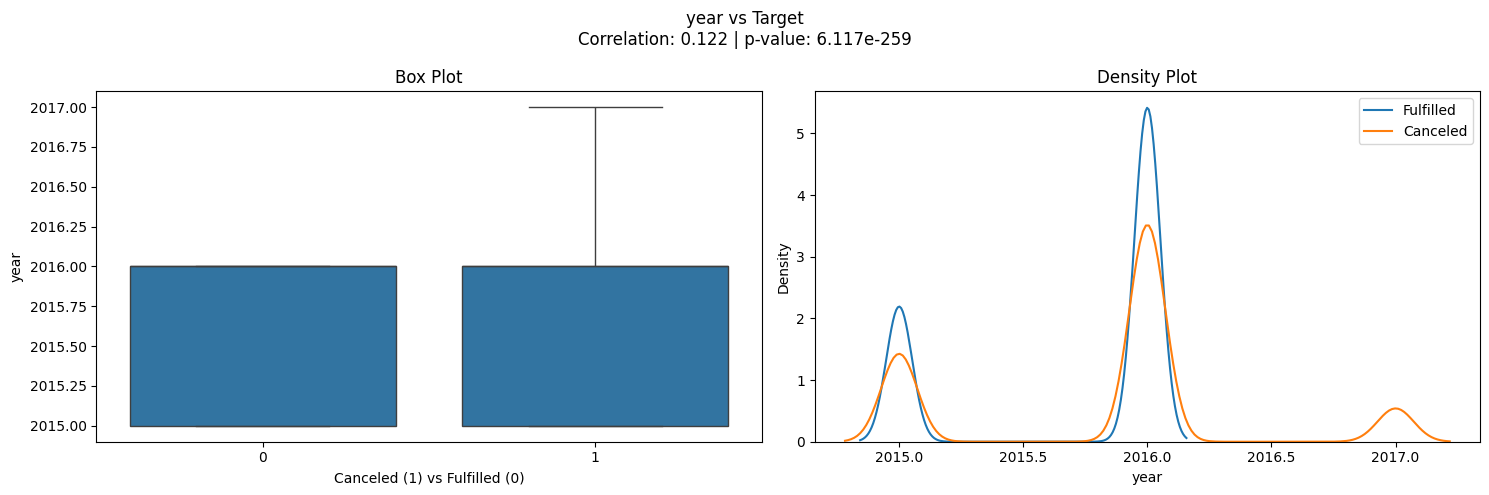

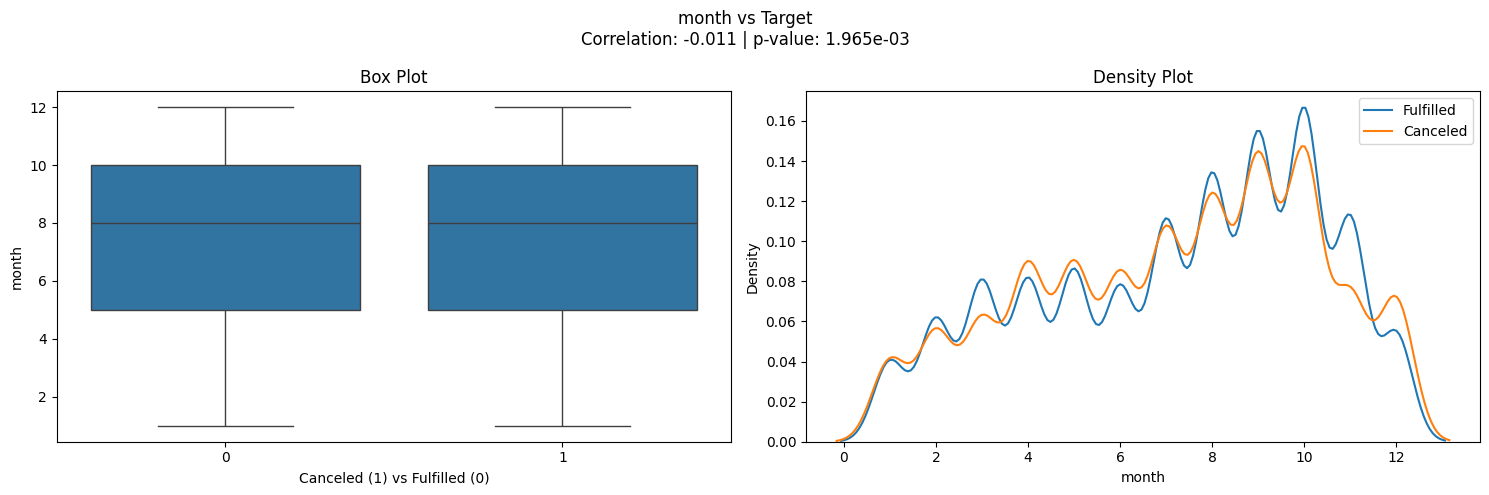

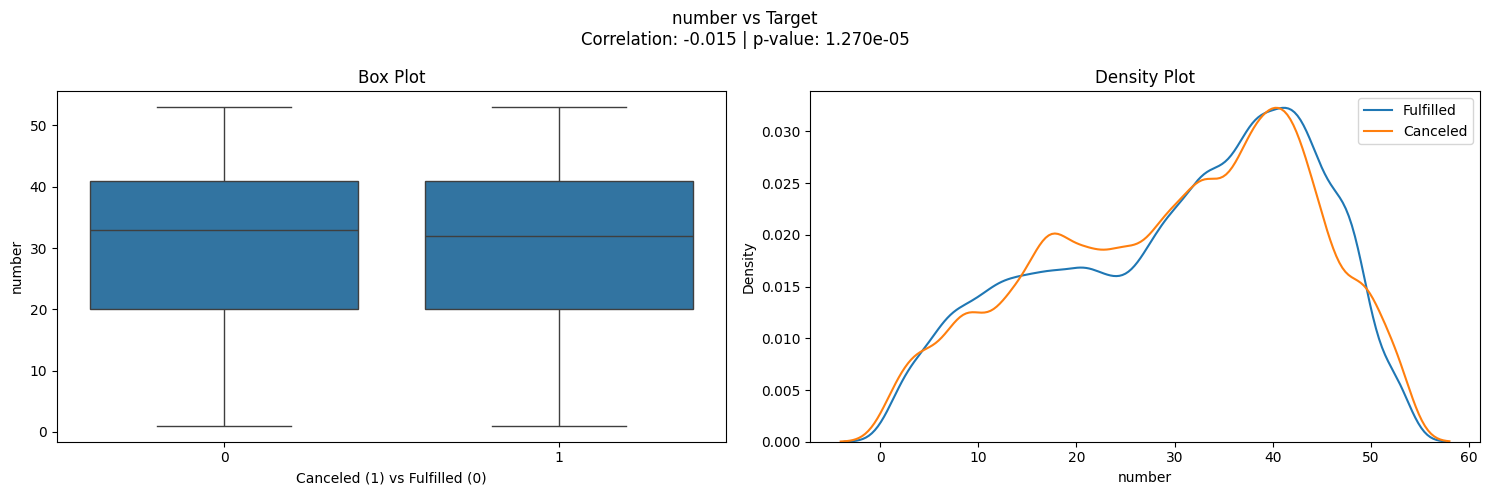

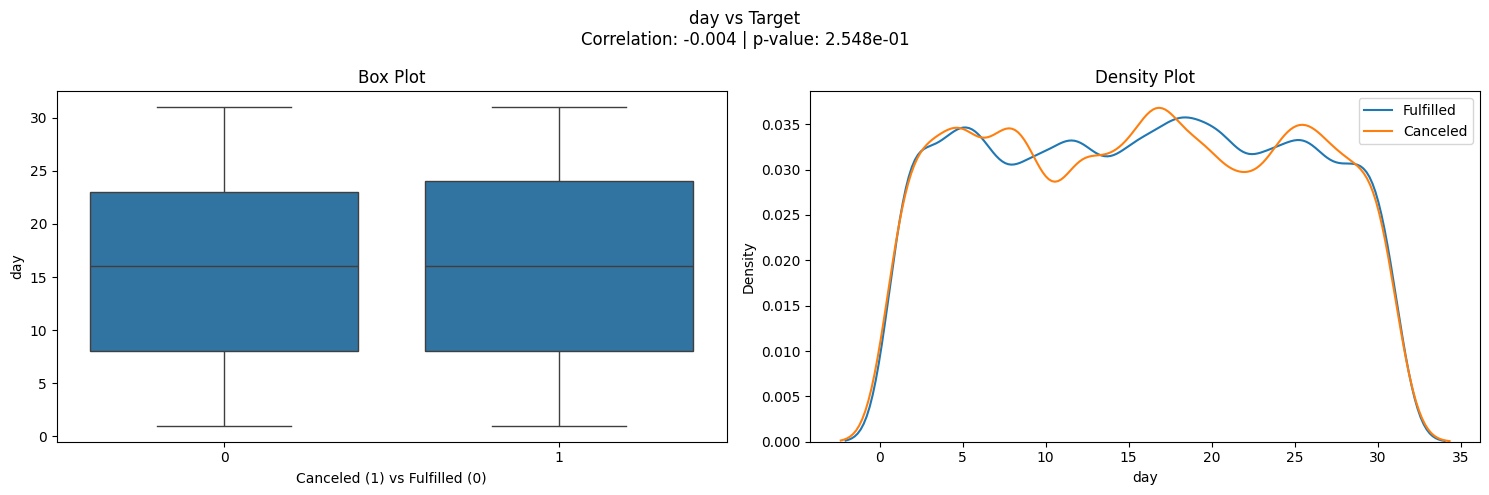

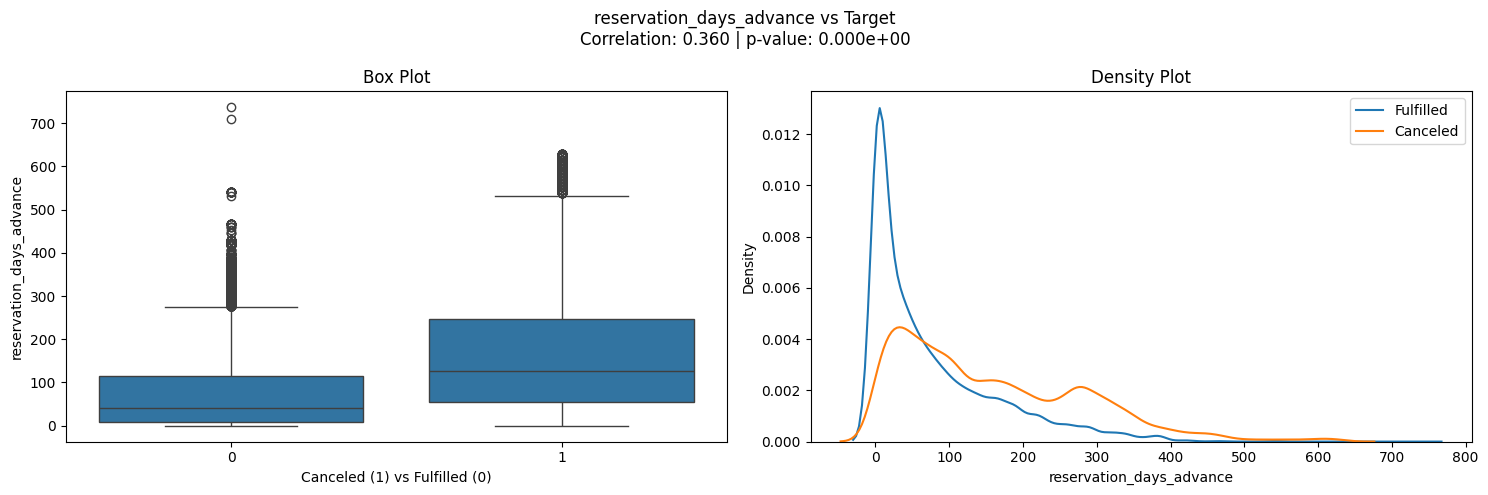

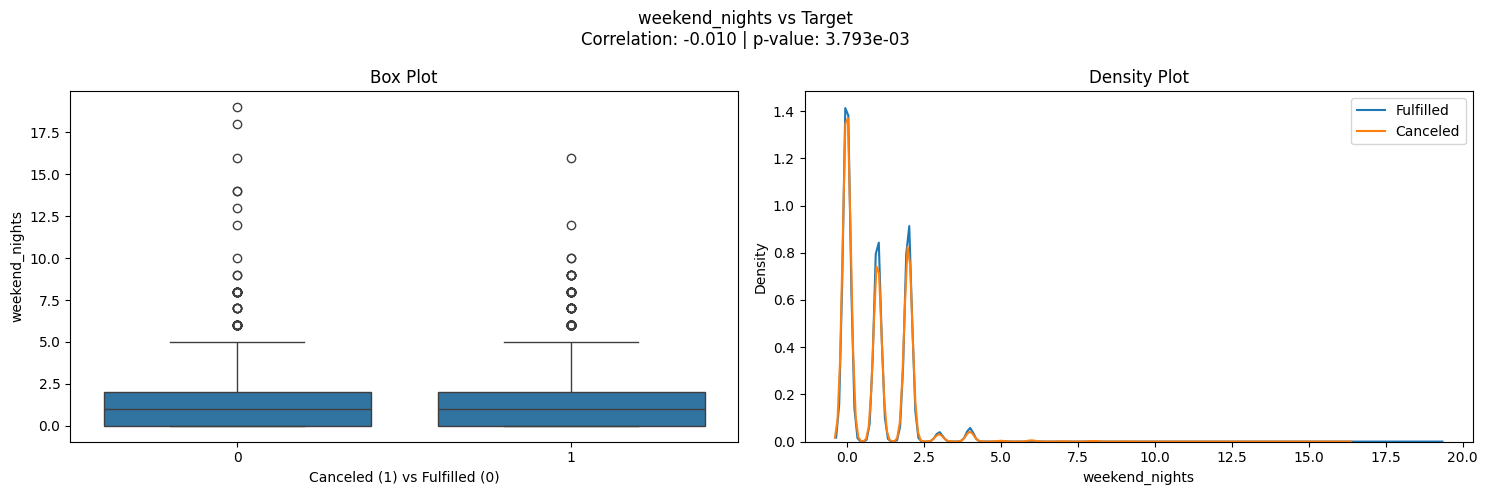

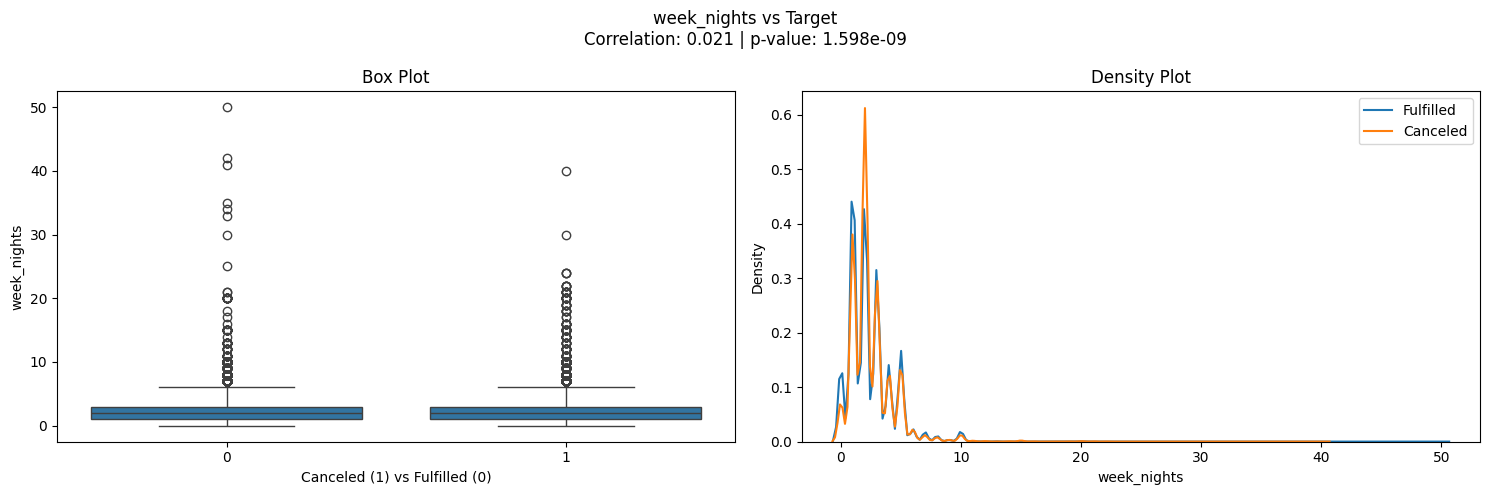

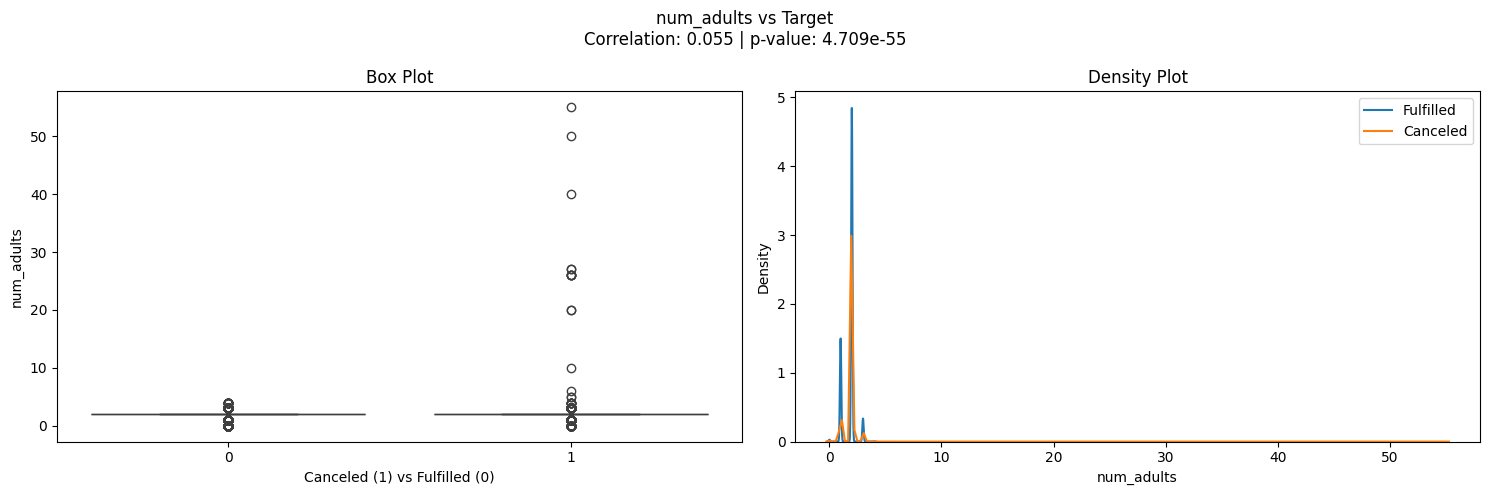

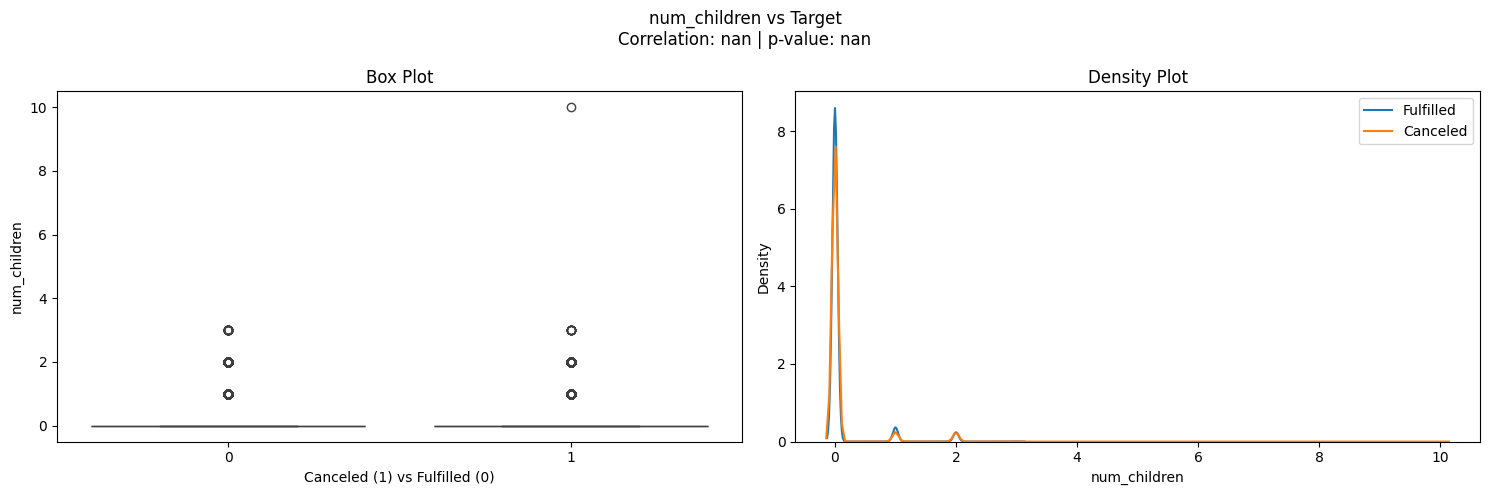

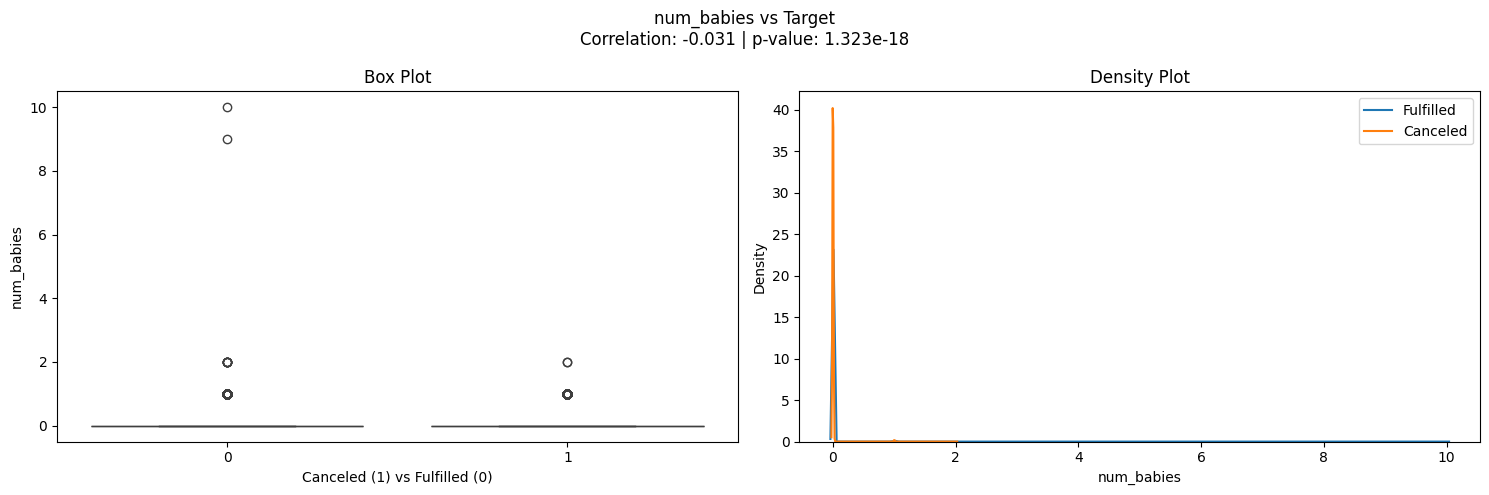

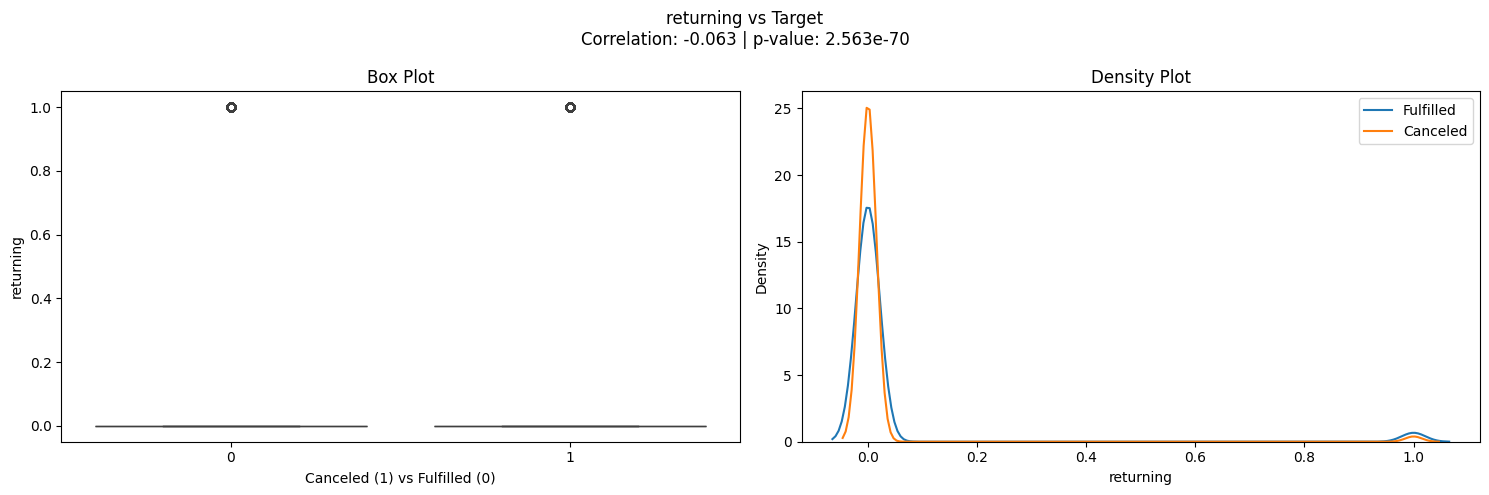

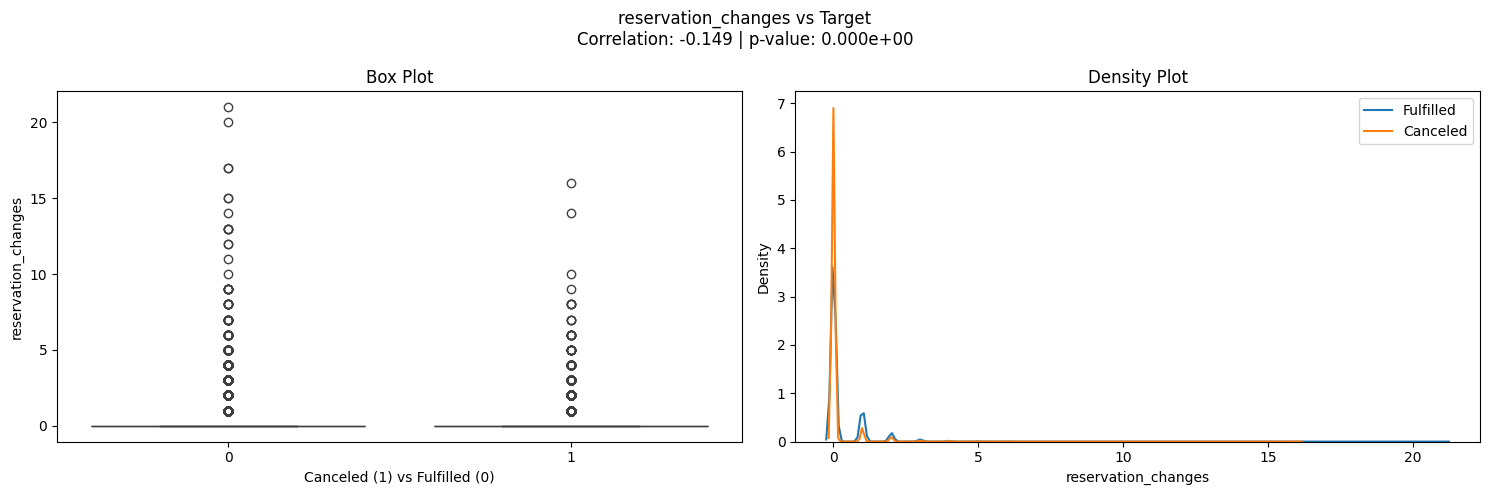

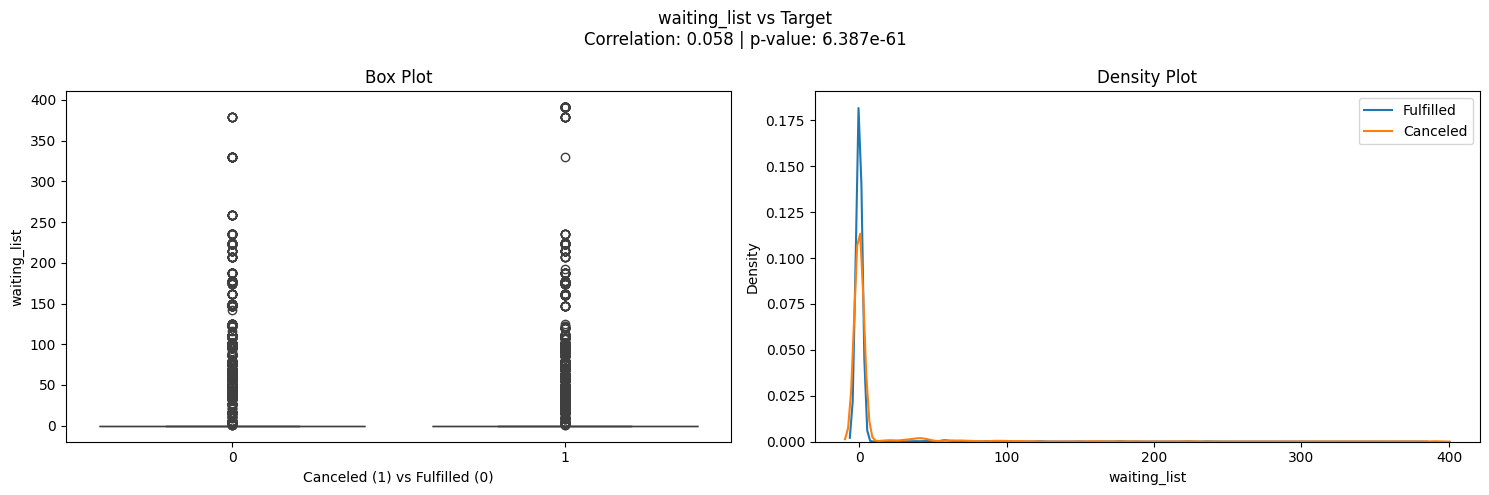

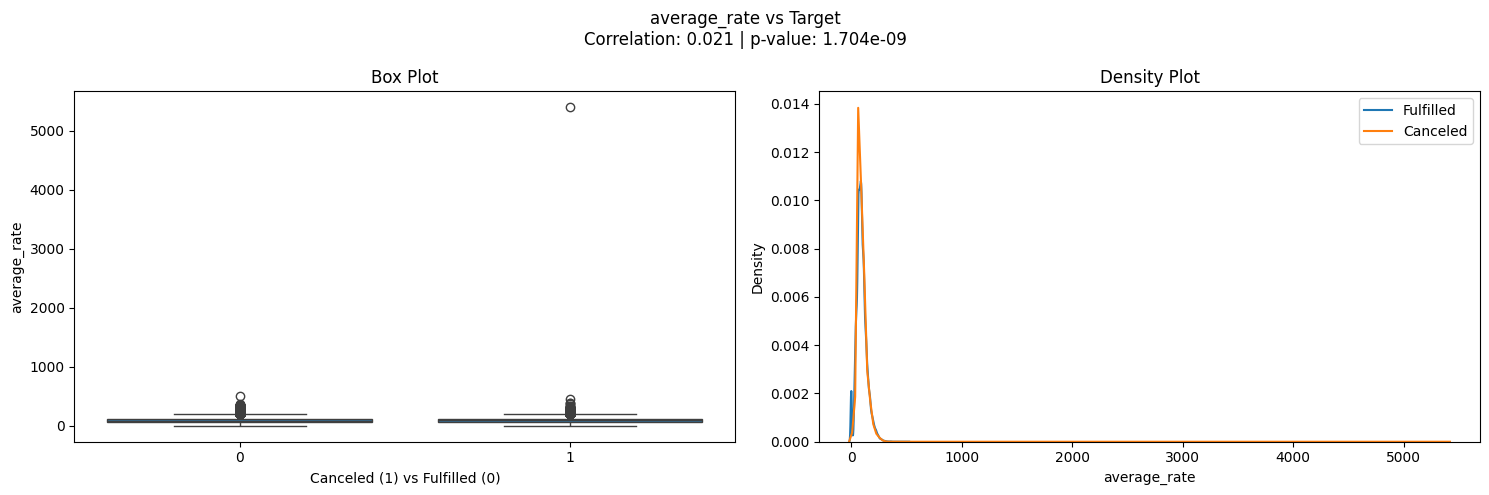

C:\Users\rsast\AppData\Local\Temp\ipykernel_17228\354252460.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, ax=ax2, label=f'{"Canceled" if target_val == 1 else "Fulfilled"}')


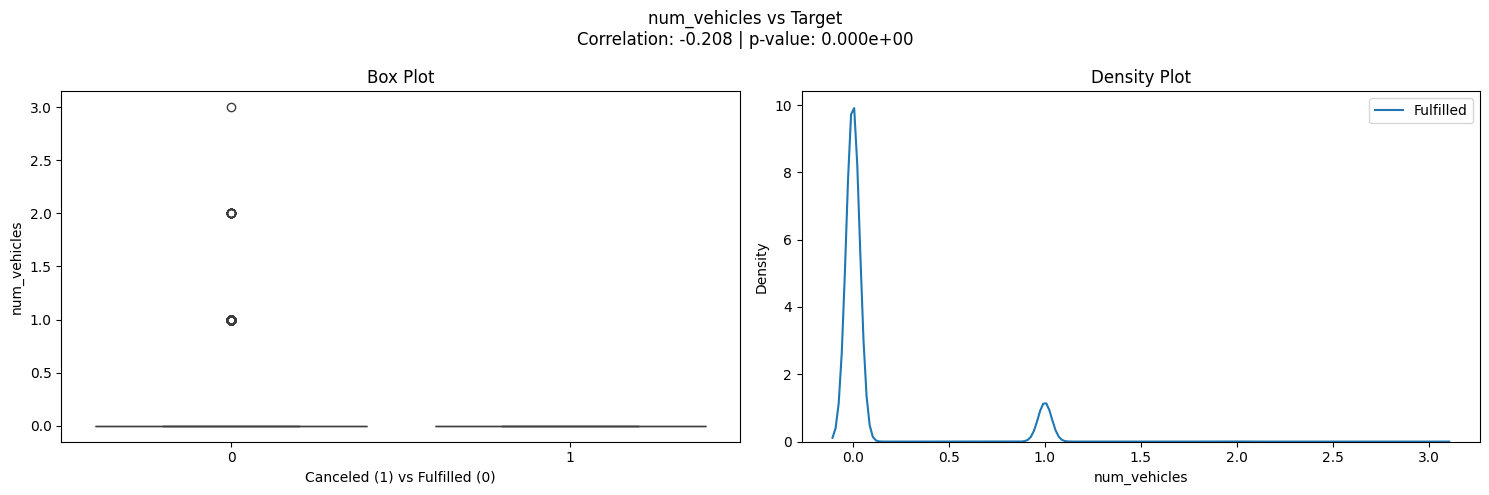

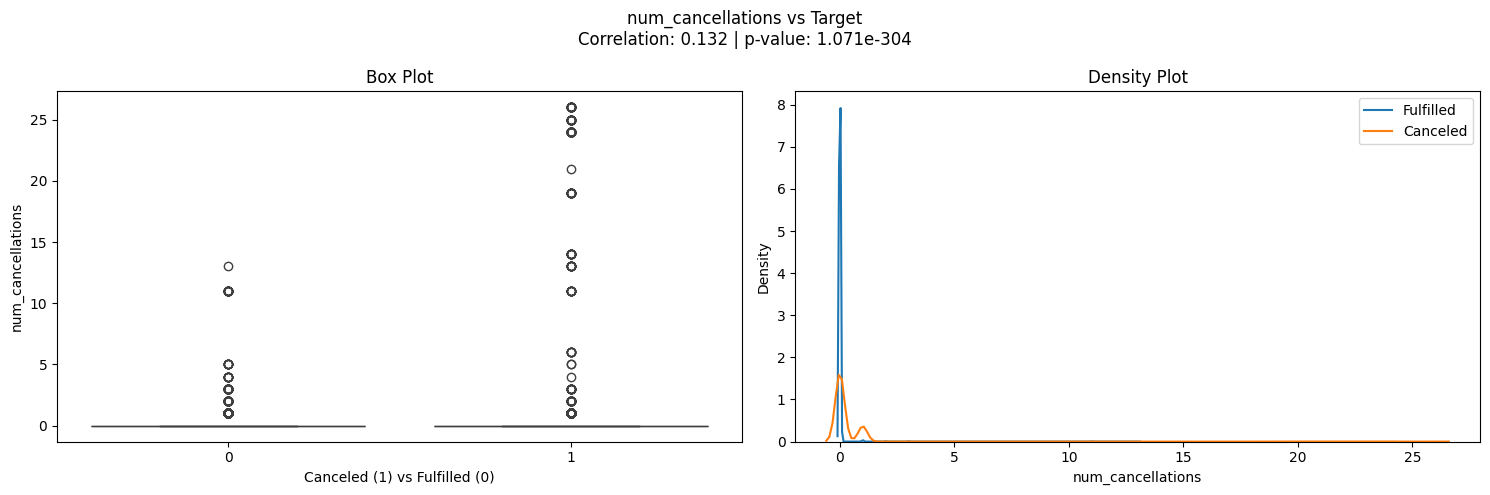

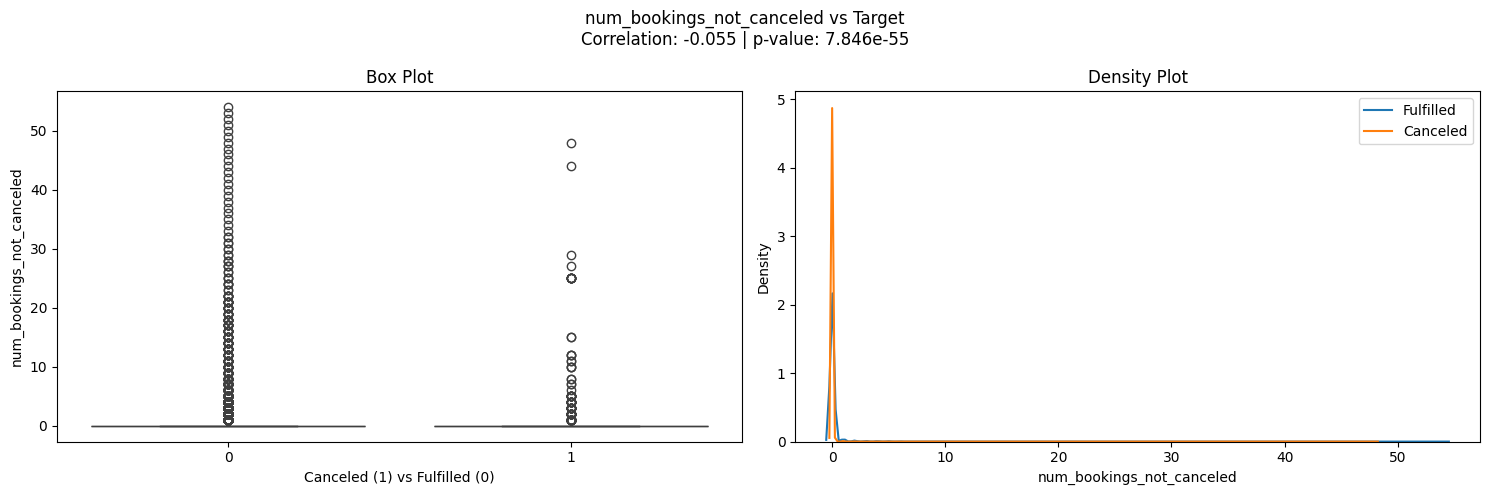

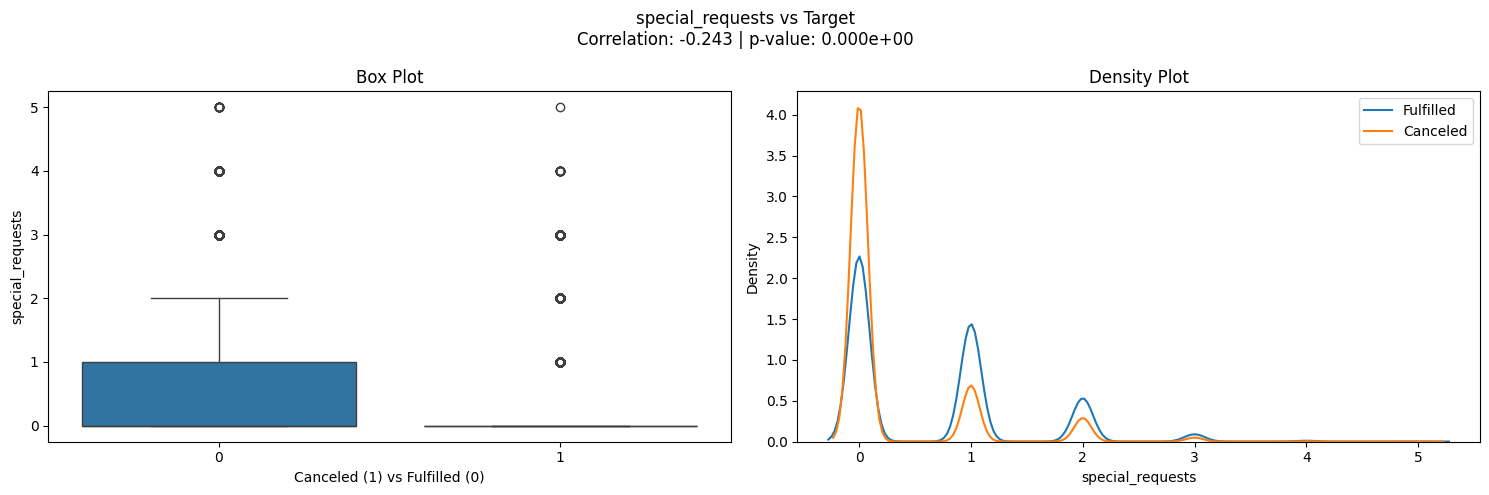

C:\Users\rsast\AppData\Local\Temp\ipykernel_17228\354252460.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, ax=ax2, label=f'{"Canceled" if target_val == 1 else "Fulfilled"}')


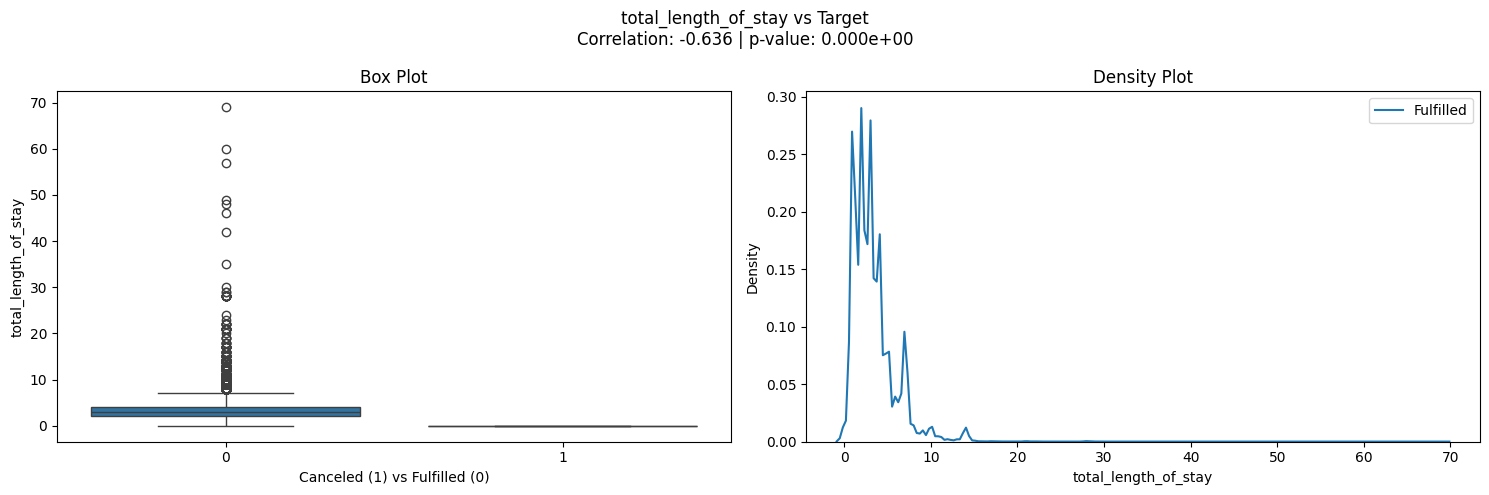

C:\Users\rsast\AppData\Local\Temp\ipykernel_17228\354252460.py:27: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, ax=ax2, label=f'{"Canceled" if target_val == 1 else "Fulfilled"}')


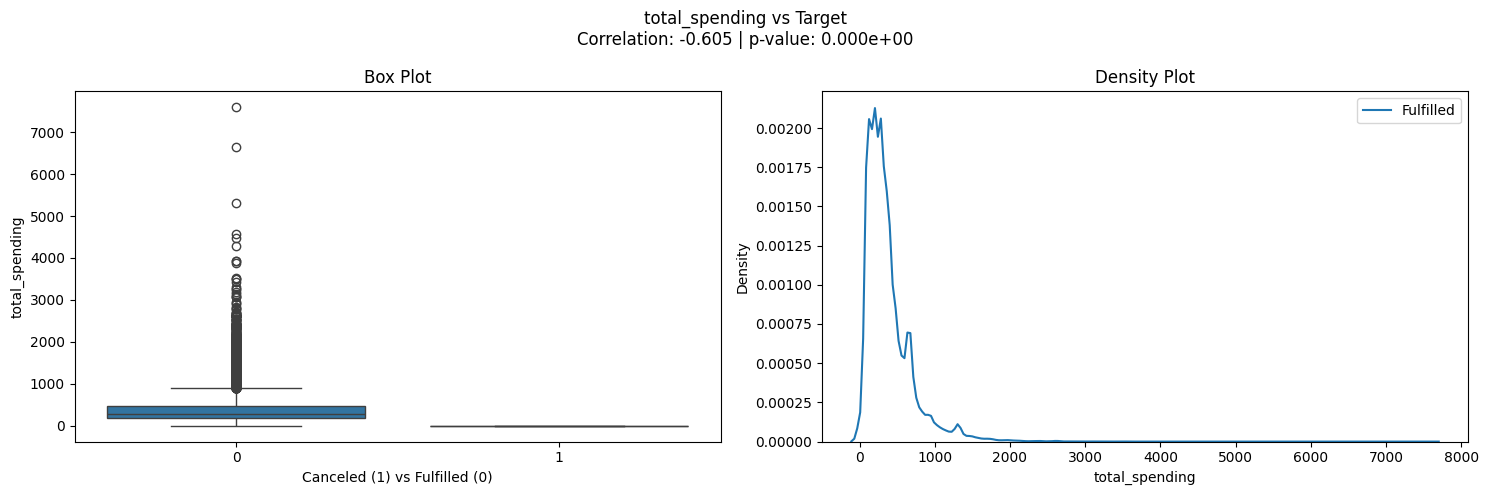

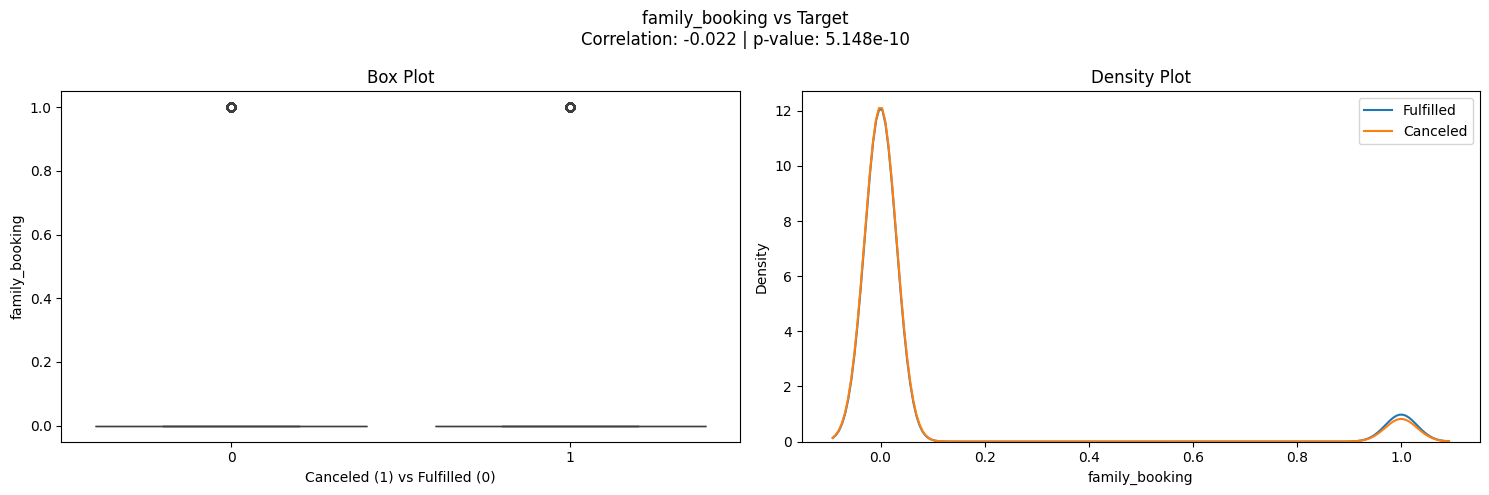

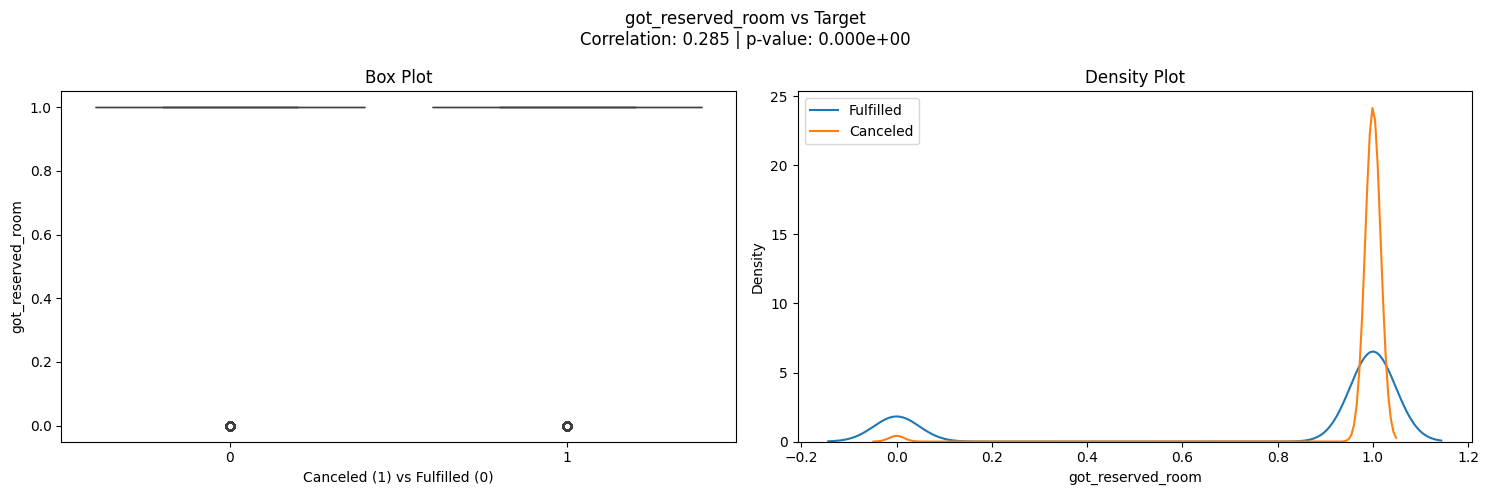

<Figure size 1200x600 with 0 Axes>

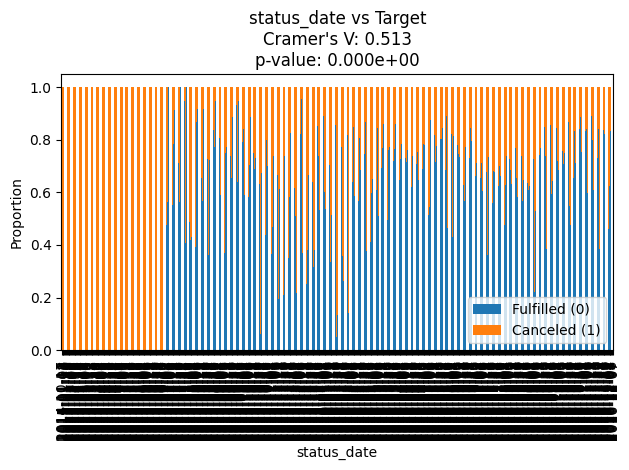

<Figure size 1200x600 with 0 Axes>

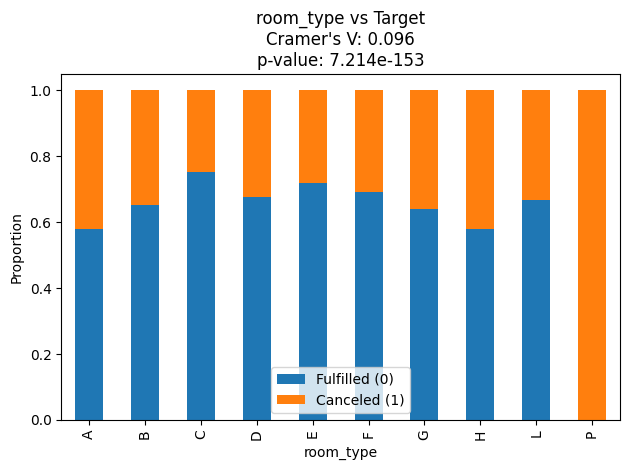

<Figure size 1200x600 with 0 Axes>

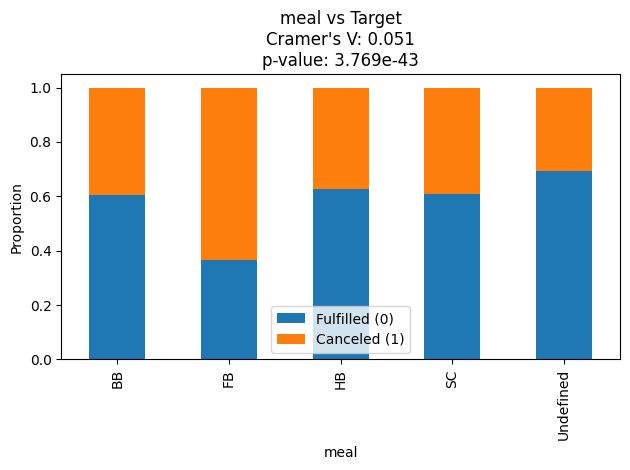

<Figure size 1200x600 with 0 Axes>

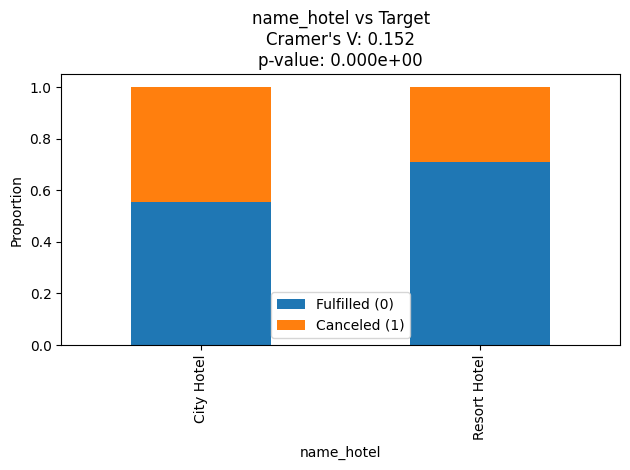

<Figure size 1200x600 with 0 Axes>

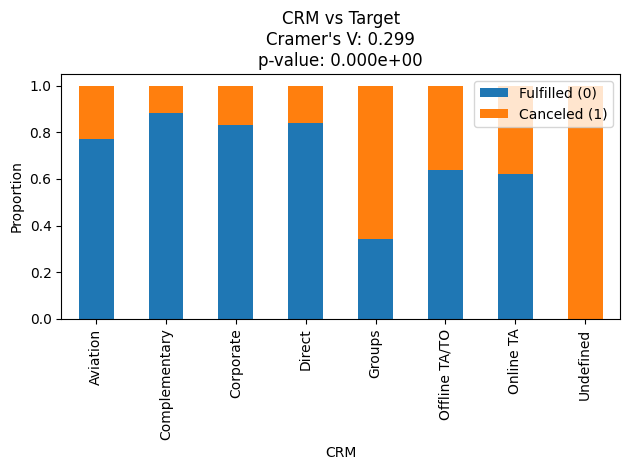

<Figure size 1200x600 with 0 Axes>

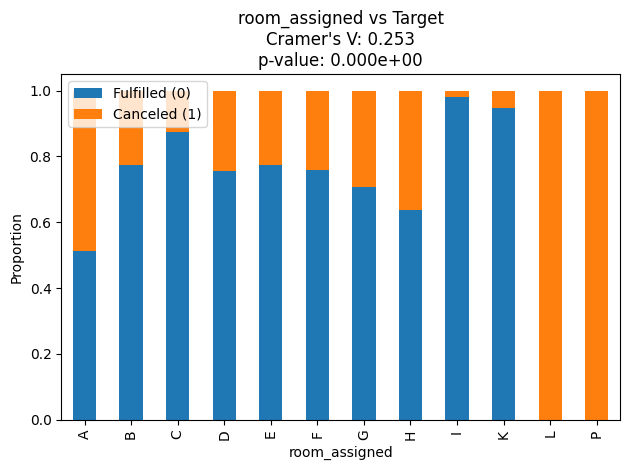

<Figure size 1200x600 with 0 Axes>

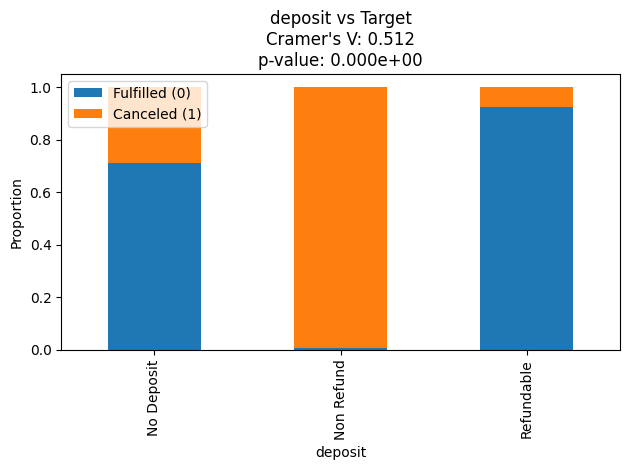

<Figure size 1200x600 with 0 Axes>

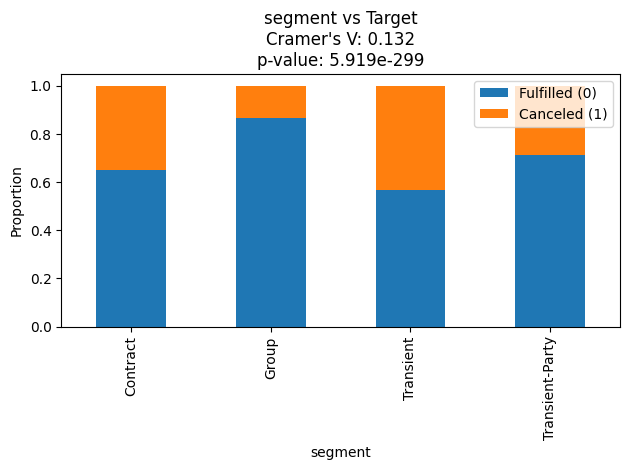

<Figure size 1200x600 with 0 Axes>

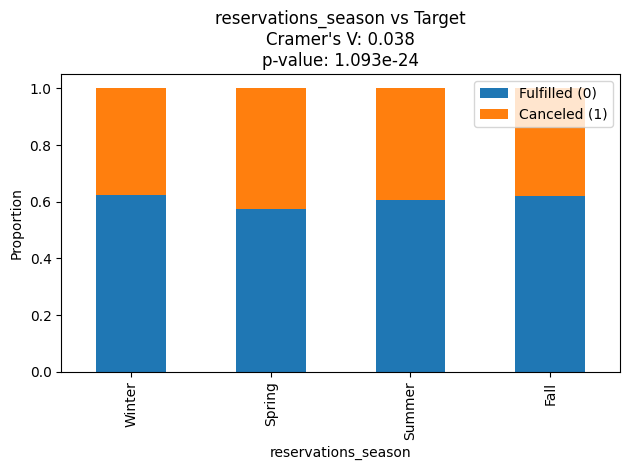

In [622]:
plot_target_relationships(reservations, target_results)

posx and posy should be finite values
posx and posy should be finite values


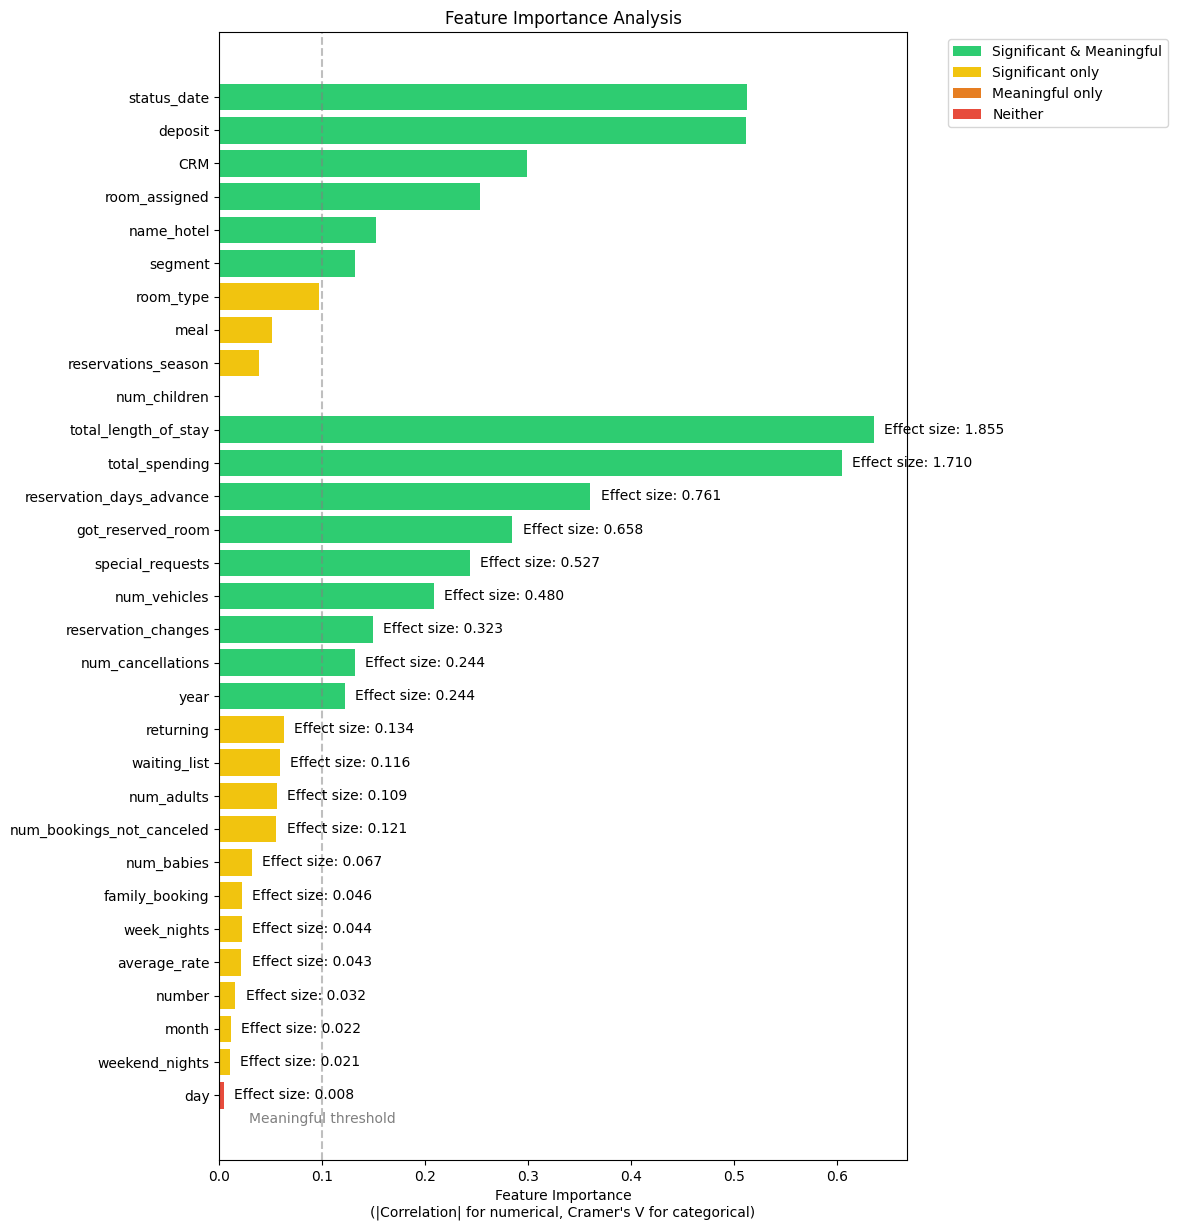

In [20]:
plot_feature_importance(target_results)

### Conclusions from Data Exploration
- Most reservations are nade for rooms with two adults.
- Short-term reservations, mostly.
- Greatest separability with regards to the target label can be seen in the got_reserved_room and reservation_days_advance features.
- Guests who request a parking space and guests who have stayed previosusly are guests less likely to cancel. 


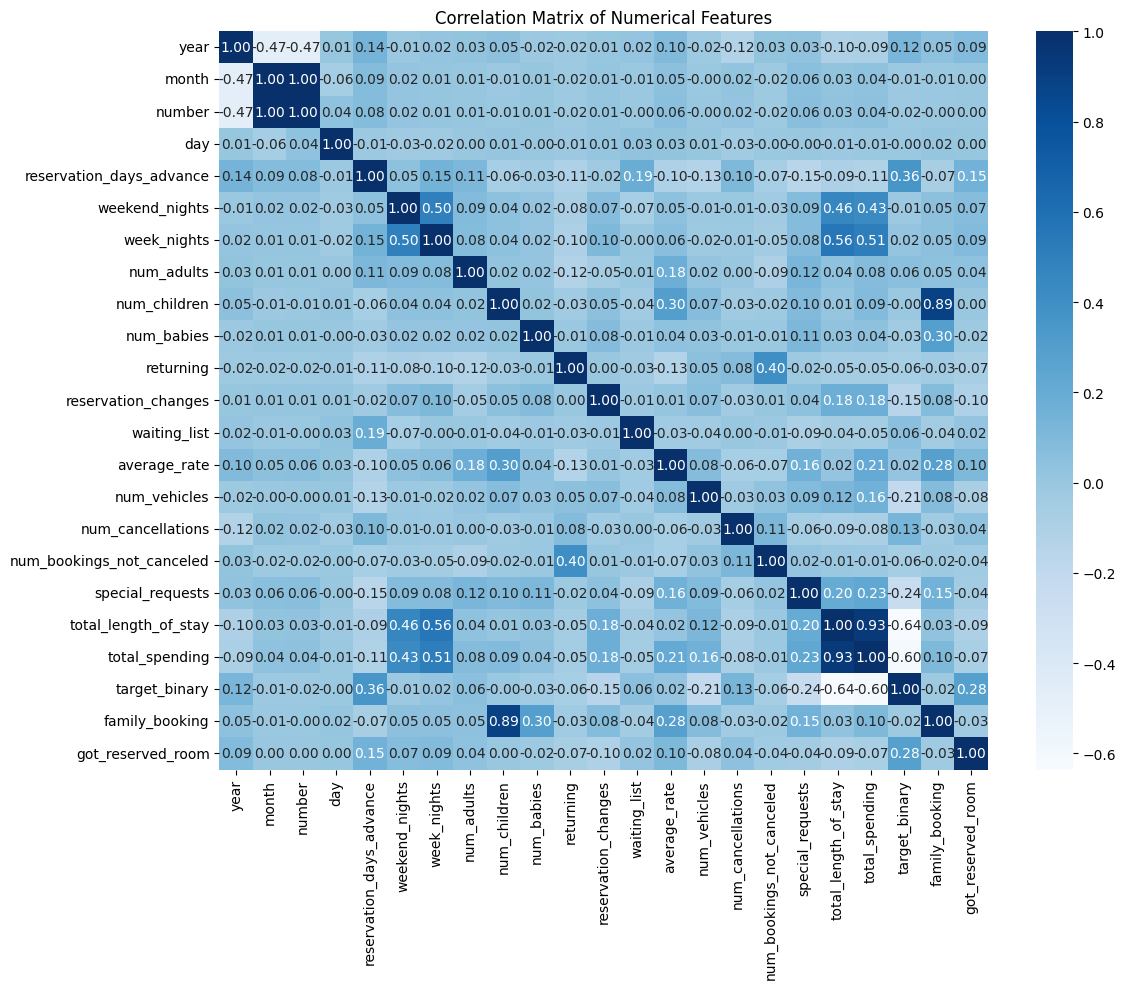


Feature Correlations with Target (Canceled vs. Not Canceled):
target_binary                1.000000
total_length_of_stay        -0.635873
total_spending              -0.604841
reservation_days_advance     0.360344
got_reserved_room            0.284666
special_requests            -0.243187
num_vehicles                -0.208307
reservation_changes         -0.149044
num_cancellations            0.131845
year                         0.121547
returning                   -0.062856
waiting_list                 0.058392
num_adults                   0.055423
num_bookings_not_canceled   -0.055307
num_babies                  -0.031238
family_booking              -0.022054
week_nights                  0.021414
average_rate                 0.021377
number                      -0.015492
month                       -0.010986
weekend_nights              -0.010274
num_children                -0.004321
day                         -0.004042
Name: target_binary, dtype: float64

Highly correlated features

year     month    number       day  \
year                       1.000000 -0.471275 -0.467981  0.006619   
month                     -0.471275  1.000000  0.995157 -0.058110   
number                    -0.467981  0.995157  1.000000  0.036731   
day                        0.006619 -0.058110  0.036731  1.000000   
reservation_days_advance   0.139649  0.086127  0.080721 -0.011921   
weekend_nights            -0.008056  0.021438  0.021305 -0.026897   
week_nights                0.018810  0.012859  0.010455 -0.024122   
num_adults                 0.026889  0.007127  0.005837  0.003079   
num_children               0.048000 -0.010612 -0.009405  0.013813   
num_babies                -0.015433  0.008665  0.008965 -0.000400   
returning                 -0.016126 -0.021196 -0.020852 -0.010064   
reservation_changes        0.007203  0.010134  0.012129  0.012751   
waiting_list               0.017479 -0.007562 -0.004797  0.029217   
average_rate               0.098261  0.052615  0.055894  0.027068   
num_vehicles              -0.016456 -0.004108 -0.002589  0.006772   
num_cancellations         -0.122075  0.022782  0.018983 -0.032650   
num_bookings_not_canceled  0.026560 -0.021270 -0.020305 -0.003299   
special_requests           0.034134  0.059656  0.061139 -0.001863   
total_length_of_stay      -0.095920  0.028614  0.030561 -0.013299   
total_spending            -0.086489  0.041200  0.043345 -0.008835   
target_binary              0.121547 -0.010986 -0.015492 -0.004042   
family_booking             0.046348 -0.006419 -0.004869  0.015268   
got_reserved_room          0.086346  0.000843  0.000908  0.004951   

                           reservation_days_advance  weekend_nights  \
year                                       0.139649       -0.008056   
month                                      0.086127        0.021438   
number                                     0.080721        0.021305   
day                                       -0.011921       -0.026897   
reservation_days_advance                   1.000000        0.046156   
weekend_nights                             0.046156        1.000000   
week_nights                                0.146646        0.499243   
num_adults                                 0.110467        0.087952   
num_children                              -0.060965        0.043931   
num_babies                                -0.029612        0.019159   
returning                                 -0.106929       -0.084535   
reservation_changes                       -0.022897        0.071438   
waiting_list                               0.193815       -0.065308   
average_rate                              -0.102395        0.045676   
num_vehicles                              -0.128211       -0.012943   
num_cancellations                          0.103614       -0.009620   
num_bookings_not_canceled                 -0.067115       -0.033101   
special_requests                          -0.154593        0.085026   
total_length_of_stay                      -0.093962        0.462471   
total_spending                            -0.113077        0.426742   
target_binary                              0.360344       -0.010274   
family_booking                            -0.069638        0.050055   
got_reserved_room                          0.154473        0.072879   

                           week_nights  num_adults  num_children  num_babies  \
year                          0.018810    0.026889      0.048000   -0.015433   
month                         0.012859    0.007127     -0.010612    0.008665   
number                        0.010455    0.005837     -0.009405    0.008965   
day                          -0.024122    0.003079      0.013813   -0.000400   
reservation_days_advance      0.146646    0.110467     -0.060965   -0.029612   
weekend_nights                0.499243    0.087952      0.043931    0.019159   
week_nights                   1.000000    0.080237      0.044016    0.018616   
num_adults                   

In [623]:
def create_correlation_matrix(df, correlation_threshold=0.6):
    '''
    create correlation matrix and identify highly correlated features
    '''
    df = prepare_target_var(df)
    
    # get numerical columns, including target
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    corr_matrix = df[numerical_cols].corr()
    
    # plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()
    
    # print target correlations
    target_corr = corr_matrix['target_binary'].sort_values(key=abs, ascending=False)
    print("\nFeature Correlations with Target (Canceled vs. Not Canceled):")
    print(target_corr)
    
    # to see which features are highly correlated with each other
    print(f"\nHighly correlated features (>{correlation_threshold}):")
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > correlation_threshold:
                print(f"{corr_matrix.columns[i]} -- {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.3f}")
    
    return corr_matrix

corr_matrix = create_correlation_matrix(reservations)
corr_matrix

#### Removing `total_spending`, `status_date` and `total_length_of_stay`
- These features were dropped to prevent data leakage, as they contain information that would not be available at the time of making a prediction:

  - `total_spending` is only known after the stay is completed.
  - `status_date` represents when the final status was recorded, which occurs after the reservation period.
  - `total_length_of_stay` is the amount of nights the customer actually stayed in the hotel, not the duration of the reservation itself. This is only non-zero when the customer does not cancel, and therefore it provides information that will not be available at the time of prediction
  


- Including such features would artificially improve the model's performance during training but would not be useful in real-world applications, as we aim to predict cancellations at the time a reservation is made

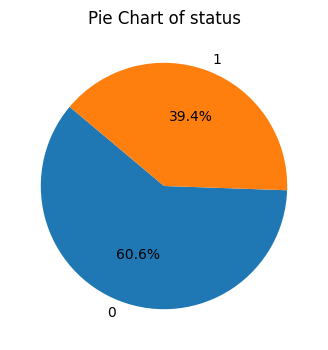

target_binary
0    0.605605
1    0.394395
Name: proportion, dtype: float64
Class 1 (Cancelled): 0.39439476004534574
Class 0 (Not-Cancelled): 0.6056052399546542


In [624]:
reservations.drop(columns=['number', 'num_children'], axis=1, inplace=True) # dropped due to high correlation 
reservations.drop(columns=['total_spending', 'status_date', 'total_length_of_stay'], axis=1, inplace=True) # dropped due to data leakage

value_counts = reservations['target_binary'].value_counts()
plt.figure(figsize = (4, 4))
plt.pie(value_counts, labels = value_counts.index, autopct = '%1.1f%%', startangle = 140)
plt.title(f"Pie Chart of {'status'}")
plt.show()

label_distributions = reservations['target_binary'].value_counts(normalize=True)
print(label_distributions)
print('Class 1 (Cancelled): '+ str(label_distributions[1]))
print('Class 0 (Not-Cancelled): '+ str(label_distributions[0]))

In [625]:
#reservations_sorted = reservations.sort_values('reservation_done_date')
#reservations_sorted.drop(columns=['reservation_date', 'reservation_done_date'], axis=1, inplace=True)

reservations.drop(columns=['reservation_date', 'reservation_done_date'], axis=1, inplace=True)
print(reservations_sorted.info())

<class 'pandas.core.frame.DataFrame'>
Index: 79390 entries, 2356 to 79389
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   year                       79390 non-null  int64   
 1   month                      79390 non-null  int64   
 2   status                     79390 non-null  object  
 3   day                        79390 non-null  int64   
 4   reservation_days_advance   79390 non-null  int64   
 5   room_type                  79390 non-null  object  
 6   weekend_nights             79390 non-null  int64   
 7   week_nights                79390 non-null  int64   
 8   num_adults                 79390 non-null  int64   
 9   num_babies                 79390 non-null  int64   
 10  meal                       79390 non-null  object  
 11  name_hotel                 79390 non-null  object  
 12  CRM                        79390 non-null  object  
 13  returning                  79390 

#### Sorting the Reservations by `reservation_date`:
- Our logic was that in real-world applications, we would be making predictions about future reservations based on past data.
- Using random splitting, we believe, could lead to some sort of data leakage where we are training future, unrealized bookings to predict ones that already occurred.
- By sorting by booking date, and splitting temporally our aim was to maintain the natural time ordering.
- **We later realized that we were wrong, after seeing some intermediate results from the models**. Still, we all relevant code was kept and commented. 

In [626]:
X_train, X_test, y_train, y_test = train_test_split(reservations.drop(columns=['target_binary', 'status']), reservations['target_binary'], test_size = 0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(reservations_sorted.drop(columns=['target_binary', 'status']), reservations['target_binary'], test_size = 0.2, random_state=42)

In [627]:
# Define feature types
numerical_features = ['reservation_days_advance', 'weekend_nights', 'week_nights', 
                      'num_adults', 'num_babies', 'num_vehicles','num_cancellations', 
                      'num_bookings_not_canceled', 'special_requests', 'average_rate', 'waiting_list',
                      'reservation_changes']

categorical_features = ['room_type', 'meal', 'name_hotel', 'CRM',
                        'room_assigned','waiting_list', 
                        'segment','reservations_season', 'deposit']

class CombineWithPCA:
    '''
    to use PCA in the preprocessing of features to reduce dimensionality
    '''
    def __init__(self, explained_variance_ratio=0.95):
        self.explained_variance_ratio = explained_variance_ratio
        self.pca = None
        self.feature_names_ = None

    def fit(self, X, y=None):
        initial_pca = PCA()
        initial_pca.fit(X)
        # calculate num. of components needed to get the desired variance
        cumsum = np.cumsum(initial_pca.explained_variance_ratio_)
        n_components = np.argmax(cumsum>=self.explained_variance_ratio) + 1

        # create another PCA with the correct number of components
        self.pca = PCA(n_components=n_components)
        self.pca.fit(X)

        self.explained_variance_ratio_ = self.pca.explained_variance_ratio_
        self.n_components_ = self.pca.n_components_
        return self

    def transform(self, X):
        return self.pca.transform(X)

    def get_feature_importance(self):
        return np.abs(self.pca.components_)

def preprocess(use_pca=False, explained_variance_ratio=0.95):
    #preprocessing pipeline for numerical features: impute missing numerical values and standardize with Z score normalization
    numerical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
    ])

    #preprocessing pipeline for categorical features: impute using most frequent value and convert using one hot encoding
    categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown = 'ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ], remainder='passthrough')

    if use_pca:
        return Pipeline([
            ('preprocessor', preprocessor),
            ('pca', CombineWithPCA(explained_variance_ratio=explained_variance_ratio))
        ])
    return preprocessor

#models to try, with the class_weight='balanced':
models = {
    'logistic': LogisticRegression(max_iter=1000, penalty='l2'),
    'rf': RandomForestClassifier(class_weight='balanced', n_jobs=-1),
    'gbm': GradientBoostingClassifier(),
    'sgd': SGDClassifier(class_weight='balanced', max_iter=1000)
}

param_grids = {
    'logistic': {
        'classifier__C': [0.001, 0.01, 0.1],
        'classifier__class_weight': ['balanced', None],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    'rf': {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [3, 5, 7],
        'classifier__class_weight': ['balanced', None]
    },
    'gbm': {
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [2, 3, 5],
        'classifier__loss': ['log_loss', 'exponential'], 
    },
    'sgd': {
        'classifier__loss': ['log_loss', 'modified_huber'],
        'classifier__penalty': ['l2', 'l1'],
        'classifier__alpha': [0.001, 0.01]}
}


In [628]:
def analyze_pca_components(preprocessor, X_train, threshold=0.95):
    ''' 
    analyze the relationship between the PCA components and the original features
    '''
    #  get transformed data without PCA
    X_preprocessed = preprocessor.fit_transform(X_train)
    pca = PCA()
    pca.fit(X_preprocessed)
    
    # cumulative explained variance
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    
    # Plot explained variance
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
             cumulative_variance_ratio, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('PCA Components Explained Variance')

    n_components = np.argmax(cumulative_variance_ratio >= threshold) + 1
    plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100}% variance threshold')
    plt.axvline(x=n_components, color='g', linestyle='--', label=f'Components needed: {n_components}')
    plt.legend()
    plt.show()
    
    print(f"Number of components needed for {threshold*100}% variance: {n_components}")
    return n_components, cumulative_variance_ratio
    

In [629]:
def train_evaluate_model(X_train, y_train, model_name, param_grid, use_pca=False, explained_variance_ratio=None):
    '''
    train and evaluate a model with options for PCA
    '''
    model = models[model_name]
    preprocessor = preprocess(use_pca=use_pca)
    
    # Create pipeline 
    pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
    ])
    
    # time series cross-validation, to do cross-validation while preserving the time ordering
    #cv = TimeSeriesSplit(n_splits=4)
    
    # Grid search with multiple metrics
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring={
            'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1': make_scorer(f1_score),
            'accuracy': make_scorer(accuracy_score)
        },
        refit='precision',
        n_jobs=-1,
        verbose=1
    )
    
    # Fit and return results
    grid_search.fit(X_train, y_train)
    
    return {
        'best_params': grid_search.best_params_,
        'best_estimator': grid_search.best_estimator_,
        'best_score': grid_search.best_score_,
        'cv_results': grid_search.cv_results_,
    }

def evaluate_all_models(X_train, X_test, y_train, y_test, use_pca=False, explained_variance_ratio=0.95):
    '''
    evaluate all models
    '''
    results = {}
    
    # first analyze PCA if requested
    if use_pca:
        preprocessor = preprocess(use_pca=False)
        n_components, variance_ratios = analyze_pca_components(preprocessor, X_train, threshold=explained_variance_ratio)
        
    
    # test each model 
    for model_name in models.keys():
        print(f"\nEvaluating {model_name}...")
        
        cv_results = train_evaluate_model(
                X_train, y_train, model_name, param_grids[model_name],
                use_pca=use_pca, explained_variance_ratio=explained_variance_ratio
            )
        best_model = cv_results['best_estimator']
        test_preds = best_model.predict(X_test)

        test_metrics = {
            'test_accuracy': accuracy_score(y_test, test_preds),
            'test_precision': precision_score(y_test, test_preds),
            'test_recall': recall_score(y_test, test_preds),
            'test_f1': f1_score(y_test, test_preds)
        }

        results[model_name] = {
            'cv_results': cv_results,
            'test_metrics': test_metrics,
            'best_model': best_model
        }

    return results

In [643]:
def results_summary(results):
    '''
    for more readability of the model results
    '''
    summary = []

    for model_name, model_results in results.items():
        cv_results = model_results['cv_results']
        test_metrics = model_results['test_metrics']

        model_summary = {
            'Model': model_name,
            'Best Parameters': cv_results['best_params'],
            'CV Precision': cv_results['best_score'],
            'Test Accuracy': test_metrics['test_accuracy'],
            'Test Precision': test_metrics['test_precision'],
            'Test Recall': test_metrics['test_recall'],
            'Test F1': test_metrics['test_f1']
        }
        summary.append(model_summary)

    summary_df = pd.DataFrame(summary)
    summary_df = summary_df.set_index('Model')
    return summary_df

In [631]:
results = evaluate_all_models(X_train, X_test, y_train, y_test)


Evaluating logistic...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Evaluating rf...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Evaluating gbm...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Evaluating sgd...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [645]:
summary = results_summary(results)
summary

Best Parameters  CV Precision  \
Model                                                                       
logistic  {'classifier__C': 0.01, 'classifier__class_wei...      0.859323   
rf        {'classifier__class_weight': None, 'classifier...      0.997905   
gbm       {'classifier__learning_rate': 0.01, 'classifie...      0.996640   
sgd       {'classifier__alpha': 0.001, 'classifier__loss...      0.791964   

          Test Accuracy  Test Precision  Test Recall   Test F1  
Model                                                           
logistic       0.827371        0.858104     0.681761  0.759835  
rf             0.771382        0.997812     0.430189  0.601187  
gbm            0.797078        0.996833     0.494969  0.661484  
sgd            0.803250        0.826869     0.643553  0.723784

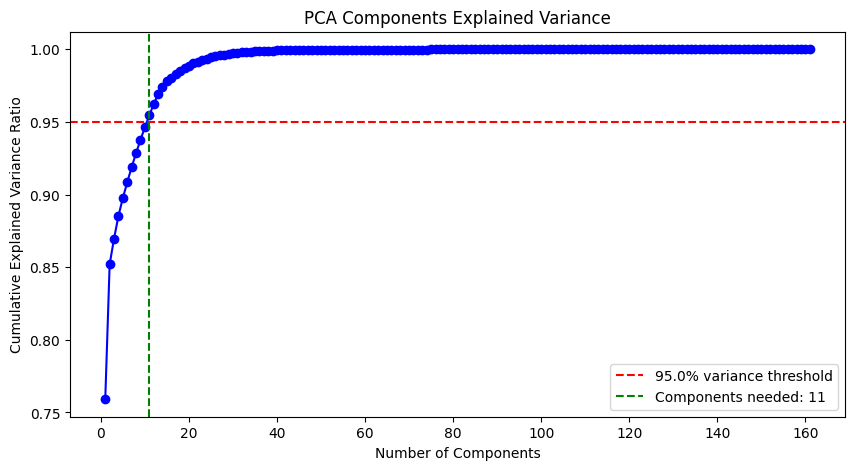

Number of components needed for 95.0% variance: 11

Evaluating logistic...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Evaluating rf...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Evaluating gbm...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



Evaluating sgd...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [633]:
results_with_pca = evaluate_all_models(X_train, X_test, y_train, y_test, use_pca=True)

In [646]:
summary_with_pca = results_summary(results_with_pca)

In [647]:
summary_with_pca

Best Parameters  CV Precision  \
Model                                                                       
logistic  {'classifier__C': 0.001, 'classifier__class_we...      0.738512   
rf        {'classifier__class_weight': None, 'classifier...      0.859041   
gbm       {'classifier__learning_rate': 0.01, 'classifie...      0.871735   
sgd       {'classifier__alpha': 0.001, 'classifier__loss...      0.643889   

          Test Accuracy  Test Precision  Test Recall   Test F1  
Model                                                           
logistic       0.748079        0.746656     0.561635  0.641062  
rf             0.804132        0.868481     0.602201  0.711235  
gbm            0.783348        0.867758     0.541667  0.666989  
sgd            0.729059        0.645545     0.717610  0.679672

<Figure size 1200x600 with 0 Axes>

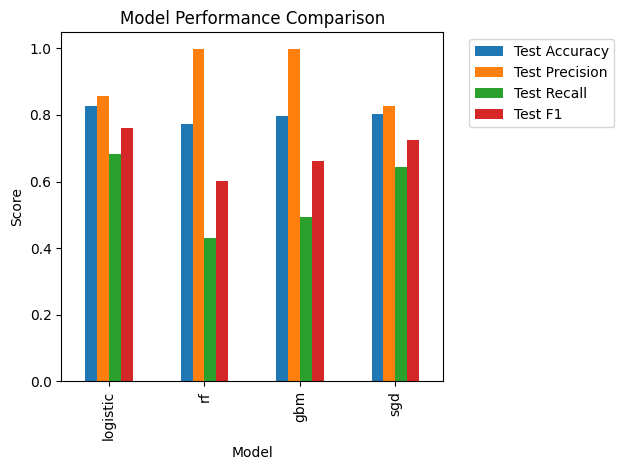

In [649]:
def plot_model_comparison(summary_df):
    '''
    Create visualizations comparing model performance
    '''
    metrics = ['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1']
    
    plt.figure(figsize=(12, 6))
    summary_df[metrics].plot(kind='bar')
    plt.title('Model Performance Comparison')
    plt.xlabel('Model')
    plt.ylabel('Score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()


plot_model_comparison(summary)




In [656]:
def calculate_business_impact(y_true, y_pred, fp_cost=1, fn_cost=3):
    '''
    Calculate business impact metrics for hotel cancellation predictions
    fp_cost: cost of false positive (predicting cancellation when customer does not cancel)
    fn_cost: cost of false negative (missing a cancelation)
    '''
    # get confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    # calculate costs
    total_fp_cost = fp * fp_cost
    total_fn_cost = fn * fn_cost
    total_cost = total_fp_cost + total_fn_cost
    
    # calculate potential maximum cost (if we had no model)
    n_actual_cancellations = tp + fn  # total actual cancellations
    n_actual_stays = tn + fp  # total actual stays
    worst_case_cost = n_actual_cancellations * fn_cost  # cost if we predicted no cancellations
    
    savings = worst_case_cost - total_cost
    
    # calculate expected cost savings rate (ECSR)
    ecsr = (savings / worst_case_cost) * 100 if worst_case_cost > 0 else 0
    
    # calculate cost per booking
    total_bookings = tn + fp + fn + tp
    cost_per_booking = total_cost / total_bookings if total_bookings > 0 else 0
    
    return {
        'Expected Cost Savings Rate (%)': round(ecsr, 2),
        'Average Cost per Booking ($)': round(cost_per_booking, 2),
        'Total Cost ($)': round(total_cost, 2),
        'False Positive Cost ($)': round(total_fp_cost, 2),
        'False Negative Cost ($)': round(total_fn_cost, 2),
        'Worst Case Cost ($)': round(worst_case_cost, 2),
        'Total Savings ($)': round(savings, 2),
        'Confusion Matrix': {
            'True Negatives': tn,
            'False Positives': fp,
            'False Negatives': fn,
            'True Positives': tp
        }
    }

def compare_model_business_impact(results, X_test, y_test):
    """
    Compare business impact across all models
    """
    business_metrics = {}
    
    for model_name, model_results in results.items():
        best_model = model_results['best_model']
        y_pred = best_model.predict(X_test)
        business_metrics[model_name] = calculate_business_impact(y_test, y_pred)
    
    # create summary DataFrame
    summary = pd.DataFrame({
        model: {
            'ECSR (%)': metrics['Expected Cost Savings Rate (%)'],
            'Cost per Booking ($)': metrics['Average Cost per Booking ($)'],
            'Total Savings ($)': metrics['Total Savings ($)']
        }
        for model, metrics in business_metrics.items()
    }).T
    
    return summary, business_metrics

business_metric_summary_with_pca, detailed_metrics = compare_model_business_impact(results_with_pca, X_test, y_test)
business_metric_summary, detailed_metrics = compare_model_business_impact(results, X_test, y_test)

print("\nBusiness Impact Summary With PCA:")
print(business_metric_summary_with_pca)
print("\nBusiness Impact Summary Without PCA:")
print(business_metric_summary)

C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\rsast\P


Business Impact Summary With PCA:
          ECSR (%)  Cost per Booking ($)  Total Savings ($)
logistic     49.81                  0.60             9504.0
rf           57.18                  0.51            10910.0
gbm          51.42                  0.58             9810.0
sgd          58.63                  0.50            11186.0

Business Impact Summary Without PCA:
          ECSR (%)  Cost per Booking ($)  Total Savings ($)
logistic     64.42                  0.43            12291.0
rf           42.99                  0.69             8202.0
gbm          49.44                  0.61             9434.0
sgd          59.86                  0.48            11422.0


C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\rsast\PycharmProjects\IntrotoAI\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [657]:
def extract_best_model(results, model_name='logistic'):
    '''
    Extract and return the best model from results, which we chose to be the PCA-reduced gbm
    '''
    best_model = results[model_name]['best_model']
    best_params = results[model_name]['cv_results']['best_params']
    
    print(f"Best parameters for {model_name}:")
    print(best_params)
    return best_model

best_model = extract_best_model(results, 'logistic')


Best parameters for logistic:
{'classifier__C': 0.01, 'classifier__class_weight': None, 'classifier__solver': 'lbfgs'}


In [686]:
def plot_logistic_coefficients(model, n_features=20):
    '''
    Plot coefficients from a fitted logistic regression model with feature names
    '''
    coefficients = model.named_steps['classifier'].coef_[0]
    
    # define pass-through features
    passthrough_features = ['family_booking', 'got_reserved_room', 'has_deposit', 
                          'year', 'month', 'day']
    
    numerical_names = numerical_features
    categorical_names = categorical_features

    # to debug
    print(f"Number of coefficients: {len(coefficients)}")
    
    # get one-hot encoded feature names
    categorical_transformer = model.named_steps['preprocessor'].named_transformers_['cat']
    onehot = categorical_transformer.named_steps['onehot']
    encoded_names = onehot.get_feature_names_out(categorical_names)
    
    feature_names = np.concatenate([numerical_names, encoded_names, passthrough_features])
    print(f"Number of feature names: {len(feature_names)}")
    # to debug
    assert len(feature_names) == len(coefficients), "Length mismatch between features and coefficients"
    
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Absolute_Value': np.abs(coefficients)
    })
    
    # sort by absolute value and get top n_features
    coef_df = coef_df.sort_values('Absolute_Value', ascending=False).head(n_features)

    plt.figure(figsize=(12, 8))
    colors = ['red' if c < 0 else 'blue' for c in coef_df['Coefficient']]
    
    # Plot horizontal bars
    plt.barh(range(len(coef_df)), coef_df['Coefficient'], color=colors)
    
    # Add feature names to y-axis
    plt.yticks(range(len(coef_df)), coef_df['Feature'], ha='right')
    
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.xlabel('Coefficient Value')
    plt.title('Logistic Regression Coefficients')
    
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='blue', label='Positive (increases likelihood of non-cancellation)'),
                      Patch(facecolor='red', label='Negative (increases likelihood of cancellation)')]
    plt.legend(handles=legend_elements, loc='lower right')
    
    plt.tight_layout()
    plt.show()
    
    return coef_df

Number of coefficients: 162
Number of feature names: 162


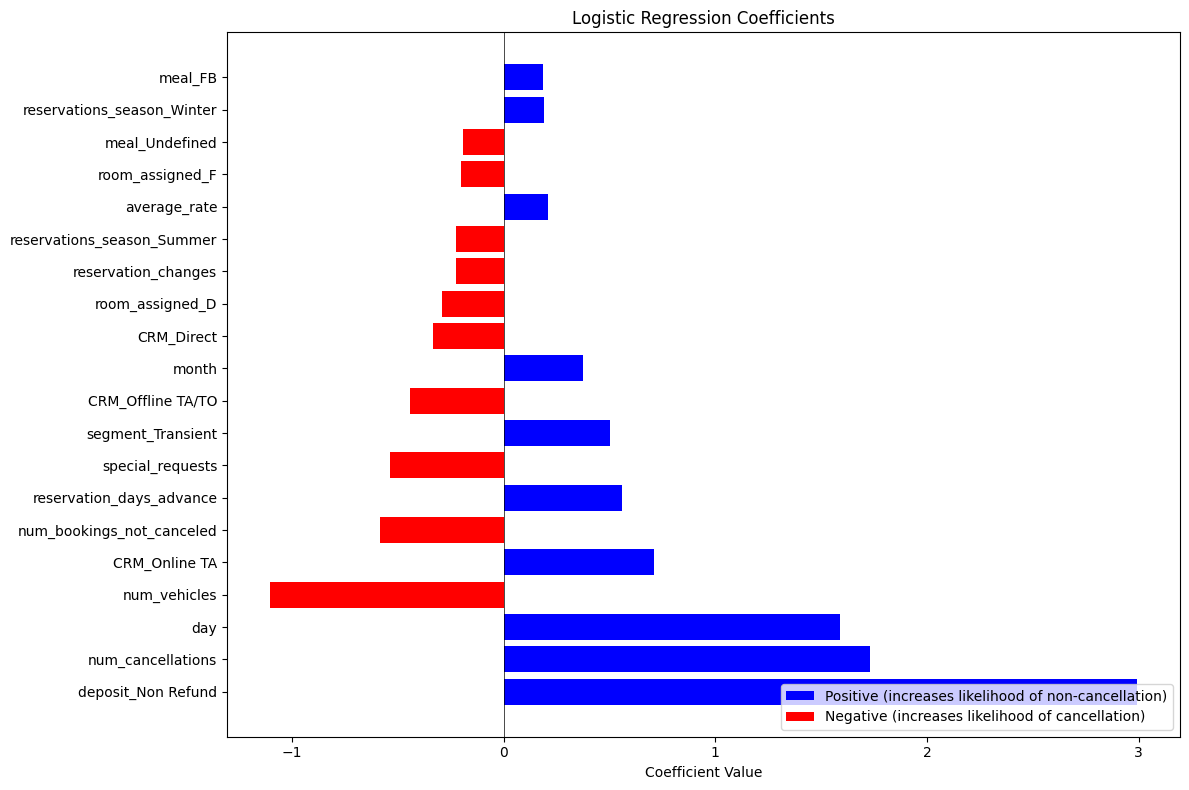

Feature  Coefficient  Absolute_Value
154          deposit_Non Refund     2.990673        2.990673
6             num_cancellations     1.729049        1.729049
161                         day     1.590357        1.590357
5                  num_vehicles    -1.102393        1.102393
31                CRM_Online TA     0.711456        0.711456
7     num_bookings_not_canceled    -0.584549        0.584549
0      reservation_days_advance     0.560135        0.560135
8              special_requests    -0.535169        0.535169
149           segment_Transient     0.504164        0.504164
30            CRM_Offline TA/TO    -0.441704        0.441704
160                       month     0.374002        0.374002
28                   CRM_Direct    -0.332607        0.332607
35              room_assigned_D    -0.291458        0.291458
11          reservation_changes    -0.224804        0.224804
152  reservations_season_Summer    -0.223404        0.223404
9                  average_rate     0.207463        0.207463
37              room_assigned_F    -0.204022        0.204022
24               meal_Undefined    -0.191439        0.191439
153  reservations_season_Winter     0.191297        0.191297
21                      meal_FB     0.183207        0.183207

In [687]:
plot_logistic_coefficients(best_model, n_features=20)